In [1]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(argparse))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(latex2exp))

setwd('/psycl/g/mpsziller/lucia/')

tissues_model <- read.csv('PriLer_PROJECT_GTEx/INPUT_DATA/final_model_gtex.csv', h=F, stringsAsFactors = F)
colnames(tissues_model) <- c('tissue', 'type')
outFold <- 'castom_cad_scz/jupyter_notebook/PriLer/'

res_CMC <- 'PriLer_PROJECT_GTEx/compare_TWAS_prediXcan/res_CMC/'
res_GTEx <- 'PriLer_PROJECT_GTEx/compare_TWAS_prediXcan/res_GTEx/'

df_tot_TWAS_v7 <- read.table(sprintf('%s/compare_PriLer_TWAS.txt', res_CMC), h=T, stringsAsFactors = F)
df_tot_TWAS_v7$tissue <- 'DLPC_CMC'
# remove some columns to have in common with gtex
df_tot_TWAS_v7 <- df_tot_TWAS_v7[, !colnames(df_tot_TWAS_v7) %in% c('top1.nsnps', 'top1.r2', 'top1.pv','bslmm.nsnps', 'bslmm.r2', 'bslmm.pv', 'id')]

for(t in tissues_model$tissue){
  
  #print(t)
  tmp <- read.table(sprintf('%s/%s_compare_PriLer_TWAS_v7.txt', res_GTEx, t), h=T, stringsAsFactors = F)
  tmp$tissue <- t
  id <- sapply(colnames(df_tot_TWAS_v7), function(x) which(colnames(tmp) == x))
  tmp <- tmp[, id]
  df_tot_TWAS_v7 <- rbind(df_tot_TWAS_v7, tmp)
  
}
df_tot_TWAS_v6p <- read.table(sprintf('%s/compare_PriLer_TWAS.txt', res_CMC), h=T, stringsAsFactors = F)
df_tot_TWAS_v6p$tissue <- 'DLPC_CMC'
# remove some columns to have in common with gtex
df_tot_TWAS_v6p <- df_tot_TWAS_v6p[, !colnames(df_tot_TWAS_v6p) %in% c('top1.nsnps', 'top1.r2', 'top1.pv', 'id')]

for(t in tissues_model$tissue){
  
  #print(t)
  tmp <- read.table(sprintf('%s/%s_compare_PriLer_TWAS_v6p.txt', res_GTEx, t), h=T, stringsAsFactors = F)
  tmp$tissue <- t
  id <- sapply(colnames(df_tot_TWAS_v6p), function(x) which(colnames(tmp) == x))
  tmp <- tmp[, id]
  df_tot_TWAS_v6p <- rbind(df_tot_TWAS_v6p, tmp)
  
}


df_tot_predixOld <- read.table(sprintf('%s/compare_PriLer_prediXcan.txt', res_CMC), h=T, stringsAsFactors = F)
df_tot_predixOld <- df_tot_predixOld[,!colnames(df_tot_predixOld) %in% 'genename']
df_tot_predixOld$tissue <- 'DLPC_CMC'

for(t in tissues_model$tissue){
  
  #print(t)
  tmp <- read.table(sprintf('%s/%s_compare_PriLer_prediXcan_v6p.txt', res_GTEx, t), h=T, stringsAsFactors = F)
  tmp$tissue <- t
  id <- sapply(colnames(df_tot_predixOld), function(x) which(colnames(tmp) == x))
  tmp <- tmp[, id]
  df_tot_predixOld <- rbind(df_tot_predixOld, tmp)
  
}


df_tot_predixNew <- NULL

for(t in tissues_model$tissue){
  
  #print(t)
  tmp <- read.table(sprintf('%s/%s_compare_PriLer_prediXcan_v7.txt', res_GTEx, t), h=T, stringsAsFactors = F)
  tmp$tissue <- t
  df_tot_predixNew <- rbind(df_tot_predixNew, tmp)
  
}


In [2]:
# load number of samples for each method 
CMC_sampleSize <- read.table(sprintf('%snSamples_methods.txt', res_CMC), h=F, stringsAsFactors = F)
PriLer_sampleSize <- read.table('PriLer_PROJECT_GTEx/INPUT_DATA/Covariates/n_samples_allTissues.txt', h=F, stringsAsFactors = F)
PriLer_sampleSize <- rbind(data.frame(V1='DLPC_CMC', V2 = CMC_sampleSize$V2[CMC_sampleSize$V1 == 'PriLer']), PriLer_sampleSize)

TWAS_v6p_sampleSize <- read.table('PriLer_PROJECT_GTEx/INPUT_DATA/TWAS/GTEx_v6p/n_samples_allTissues.txt', h=F, stringsAsFactors = F,  sep = '\t')
TWAS_v6p_sampleSize <-  rbind(data.frame(V1='DLPC_CMC', V2 = CMC_sampleSize$V2[CMC_sampleSize$V1 == 'TWAS']), TWAS_v6p_sampleSize)
TWAS_v7_sampleSize <- read.table('PriLer_PROJECT_GTEx/INPUT_DATA/TWAS/GTEx_v7/n_samples_allTissues.txt', h=F, stringsAsFactors = F,  sep = '\t')
TWAS_v7_sampleSize <-  rbind(data.frame(V1='DLPC_CMC', V2 = CMC_sampleSize$V2[CMC_sampleSize$V1 == 'TWAS']), TWAS_v7_sampleSize)

prediXcanOld_sampleSize <- read.table('PriLer_PROJECT_GTEx/INPUT_DATA/prediXcan/GTEx_v6p/n_samples_allTissues.txt', h=F, stringsAsFactors = F)
prediXcanOld_sampleSize <-  rbind(data.frame(V1='DLPC_CMC', V2 = CMC_sampleSize$V2[CMC_sampleSize$V1 == 'prediXcan']), prediXcanOld_sampleSize)

prediXcanNew_sampleSize <- read.table('PriLer_PROJECT_GTEx/INPUT_DATA/prediXcan/GTEx_v7/n_samples_allTissues.txt', h=F, stringsAsFactors = F)

color_other_TWAS_v6p <- "#FF7F0EFF"
color_other_TWAS_v7 <- "#FF7F50"
color_other_prediXcan_v6p <- "#D62728FF"
color_other_prediXcan_v7 <-  "#9467BDFF"

order_tissues <- rev(c(1:7, 22:23, 8:15, 19:21, 32, 30, 17:18,16, 24:29, 31, 33:34))
color_tissues <- rev(c('#000080', rep('#999900',2),'#3CB371', rep('#CD5C5C', 3), rep('#DC143C', 2), rep('#4169E1', 8), rep('#8B4513', 7), '#FF8C00', '#8A2BE2','#708090','#A52A2A',
                       '#3CB371', rep('#FA8072', 2), rep('#3CB371', 2), '#FF8C00'))

In [3]:
# function to create plot:

plots_summary_comp <- function(df_tot, PriLer_eval, other_eval, other_nsnps, other_nsnps_window = NA, subset_tissue = NA, 
                               other_name, order_tissues, color_tissues, other_name_save, eval_title_plot, color_other, 
                               sampleSize_file_other, height_val = 10, width_val = 6.2, outFold, plot_print = F){
  
  # remove test NA
  df_tot_noNA <- df_tot[!is.na(df_tot[, PriLer_eval]) & !is.na(df_tot$n_snps),]
  if(!is.na(subset_tissue)){
    df_tot_noNA <- df_tot_noNA[df_tot_noNA$tissue %in% subset_tissue, ]
  }
  df_pl <- data.frame(corr2 = c(df_tot_noNA[, PriLer_eval]^2, df_tot_noNA[, other_eval]), nsnps = c(df_tot_noNA$n_snps, df_tot_noNA[,other_nsnps]))
  if(!is.na(other_nsnps_window)){
    df_pl$nsnps_window <- c(df_tot_noNA$n_snps_gene_window, df_tot_noNA[,other_nsnps_window])
  }
  df_pl$tissue <- rep(df_tot_noNA$tissue,2)
  df_pl$method <-  c(rep('PriLer',nrow(df_tot_noNA)), rep(other_name, nrow(df_tot_noNA)))
  
  df_pl$log_nspns <- log2(df_pl$nsnps+1) 
  if(!is.na(other_nsnps_window)){df_pl$log_nspns_window <- log2(df_pl$nsnps_window+1)}
  names_t <- unique(df_pl$tissue)
  df_pl$tissue <- factor(df_pl$tissue, levels = names_t[order_tissues])
  df_pl$method <- factor(df_pl$method, levels = rev(c('PriLer', other_name)))
  
  # test for different distributions (corr2)
  test_res <- lapply(levels(df_pl$tissue), function(x) wilcox.test(df_pl$corr2[df_pl$tissue == x & df_pl$method == 'PriLer'],
                                                                   df_pl$corr2[df_pl$tissue == x & df_pl$method == other_name], paired = T))
  
  sign_diff_method <- sapply(test_res, function(x) x$p.value)
  # diff_method <-  sapply(test_res, function(x) x$estimate)
  diff_method <- sapply(levels(df_pl$tissue), function(x) median(df_pl$corr2[df_pl$tissue == x & df_pl$method == 'PriLer']-
                                                                   df_pl$corr2[df_pl$tissue == x & df_pl$method == other_name]))
  
  df_sign <- data.frame(sign = sign_diff_method, est = diff_method, tissue = levels(df_pl$tissue))
  df_sign$new_names <- df_sign$tissue
  df_sign$new_names[df_sign$sign<=0.01 & df_sign$sign>0.001] <- paste0('*', df_sign$new_names[df_sign$sign<=0.01 & df_sign$sign>0.001])
  df_sign$new_names[df_sign$sign<=0.001 & df_sign$sign>0.00001]<- paste0('**', df_sign$new_names[df_sign$sign<=0.001 & df_sign$sign>0.00001])
  df_sign$new_names[df_sign$sign<=0.00001]<- paste0('***', df_sign$new_names[df_sign$sign<=0.00001])
  df_sign$face <- 'plain'
  df_sign$face[df_sign$est>0] <- 'bold.italic'
  df_sign$color <- color_tissues
  
  df_diff <- data.frame(tissue = df_sign$tissue, w.test_corr2_pval = df_sign$sign, w.test_corr2_median = df_sign$est, cor_corr2_pval = 0, cor_corr2_est = 0, n_genes = 0)
  df_diff$n_genes <- sapply(df_diff$tissue, function(x) length(which(df_tot_noNA$tissue == x)))
  df_diff$cor_corr2_pval <- sapply(df_diff$tissue, function(x) cor.test(df_tot_noNA[df_tot_noNA$tissue == x, PriLer_eval]^2, df_tot_noNA[df_tot_noNA$tissue == x, other_eval])$p.value)
  df_diff$cor_corr2_est <- sapply(df_diff$tissue, function(x) cor.test(df_tot_noNA[df_tot_noNA$tissue == x, PriLer_eval]^2, df_tot_noNA[df_tot_noNA$tissue == x, other_eval])$est)
  
  df_diff <- rbind(df_diff, data.frame(tissue = 'All', 
                                       w.test_corr2_pval =  wilcox.test(df_pl$corr2[df_pl$method == 'PriLer'],df_pl$corr2[df_pl$method == other_name], paired = T)$p.value, 
                                       w.test_corr2_median =  median(df_pl$corr2[df_pl$method == 'PriLer'] - df_pl$corr2[df_pl$method == other_name]), 
                                       cor_corr2_pval = cor.test(df_tot_noNA[, PriLer_eval]^2, df_tot_noNA[, other_eval])$p.value, 
                                       cor_corr2_est = cor.test(df_tot_noNA[, PriLer_eval]^2, df_tot_noNA[, other_eval])$est, 
                                       n_genes = nrow(df_tot_noNA)))
  # save
  write.table(file = sprintf('%sCorr_pred_perTissue_PriLer_%s.txt', outFold, other_name_save), x = df_diff, col.names = T, row.names = F, sep = '\t', quote = F)
  
  pl_box <- ggplot(df_pl, aes(x = tissue, y = corr2, fill = method)) +
    geom_boxplot(outlier.size = 0.5, alpha = 0.6) + ggtitle(eval_title_plot)+
    stat_summary(position = position_dodge(width = 0.75), fun=mean, colour="darkred", geom="point", shape=18, size=1,show.legend = FALSE)+
    xlab('') +  theme_classic() + ylab(TeX('$corr^2$')) + theme(legend.position = 'bottom', plot.title = element_text(hjust = 0.5), 
                                                                axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
                                                                axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1), 
                                                                axis.text.y = element_text(color = df_sign$color, face = df_sign$face))+
    scale_x_discrete(labels = df_sign$new_names)+
    scale_fill_manual(values = rev(c("#1F77B4FF",color_other)))+ coord_flip()
  
  if(plot_print){
      output_pl <- list(corr = pl_box)
  }else{
      output_pl <- ''
  }              

  file_name <- sprintf('%scomparison_methods_corr2_PriLer_%s.png', outFold, other_name_save)
  ggsave(file_name, pl_box, width = width_val, height = height_val, units = "in", dpi=500)
  file_name <- sprintf('%scomparison_methods_corr2_PriLer_%s.pdf', outFold, other_name_save)
  ggsave(file_name, pl_box, width = width_val, height = height_val, units = "in", dpi=500)
  
  # test for different distributions (nsnps)
  test_res_nsnps <- lapply(levels(df_pl$tissue), function(x) wilcox.test(df_pl$log_nspns[df_pl$tissue == x & df_pl$method == 'PriLer'],
                                                                         df_pl$log_nspns[df_pl$tissue == x & df_pl$method == other_name], paired = T))
  
  sign_diff_method_nsnps <- sapply(test_res_nsnps, function(x) x$p.value)
  diff_method_nsnps <-  sapply(levels(df_pl$tissue), function(x) median(df_pl$log_nspns[df_pl$tissue == x & df_pl$method == 'PriLer']-
                                                                          df_pl$log_nspns[df_pl$tissue == x & df_pl$method == other_name]))
  df_sign_nsnps <- data.frame(sign = sign_diff_method_nsnps, est = diff_method_nsnps, tissue = levels(df_pl$tissue))
  df_sign_nsnps$new_names <- df_sign_nsnps$tissue
  df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.01 & df_sign_nsnps$sign>0.001] <- paste0('*', df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.01 & df_sign_nsnps$sign>0.001])
  df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.001 & df_sign_nsnps$sign>0.00001]<- paste0('**', df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.001 & df_sign_nsnps$sign>0.00001])
  df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.00001]<- paste0('***', df_sign_nsnps$new_names[df_sign_nsnps$sign<=0.00001])
  df_sign_nsnps$face <- 'plain'
  df_sign_nsnps$face[df_sign_nsnps$est<0] <- 'bold.italic'
  df_sign_nsnps$color <- color_tissues
  
  pl_box_nsnps <- ggplot(df_pl, aes(x = tissue, y = log_nspns, fill = method)) +
    geom_boxplot(outlier.size = 0.5, alpha = 0.6) + ggtitle(TeX('N. reg-SNPs final model'))+
    stat_summary(  position = position_dodge(width = 0.75), fun=mean, colour="darkred", geom="point", shape=18, size=1,show.legend = FALSE)+
    xlab('') +  theme_classic() + ylab(TeX('log2(n.snps+1)')) + theme(legend.position = 'bottom', plot.title = element_text(hjust = 0.5), 
                                                                      axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
                                                                      axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1), 
                                                                      axis.text.y = element_text(color = df_sign_nsnps$color, face = df_sign_nsnps$face))+
    scale_x_discrete(labels = df_sign_nsnps$new_names)+
    scale_fill_manual(values = rev(c("#1F77B4FF",color_other)))+ coord_flip()
                               
  if(plot_print){output_pl$n_snps <- pl_box_nsnps}

  file_name <- sprintf('%scomparison_methods_nsnps_PriLer_%s.png', outFold, other_name_save)
  ggsave(file_name, pl_box_nsnps, width = width_val, height = height_val, units = "in", dpi=500)
  file_name <- sprintf('%scomparison_methods_nsnps_PriLer_%s.pdf', outFold, other_name_save)
  ggsave(file_name, pl_box_nsnps, width = width_val, height = height_val, units = "in", dpi=500)
  
  if(!is.na(other_nsnps_window)){
    test_res_wnsnps <- lapply(levels(df_pl$tissue), function(x) wilcox.test(df_pl$log_nspns_window[df_pl$tissue == x & df_pl$method == 'PriLer'],
                                                                            df_pl$log_nspns_window[df_pl$tissue == x & df_pl$method == other_name], paired = T))
    
    sign_diff_method_wnsnps <- sapply(test_res_wnsnps, function(x) x$p.value)
    diff_method_wnsnps <-  sapply(levels(df_pl$tissue), function(x) median(df_pl$log_nspns_window[df_pl$tissue == x & df_pl$method == 'PriLer']-
                                                                             df_pl$log_nspns_window[df_pl$tissue == x & df_pl$method == other_name]))
    
    df_sign_wnsnps <- data.frame(sign = sign_diff_method_wnsnps, est = diff_method_wnsnps, tissue = levels(df_pl$tissue))
    df_sign_wnsnps$new_names <- df_sign_wnsnps$tissue
    df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.01 & df_sign_wnsnps$sign>0.001] <- paste0('*', df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.01 & df_sign_wnsnps$sign>0.001])
    df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.001 & df_sign_wnsnps$sign>0.00001]<- paste0('**', df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.001 & df_sign_wnsnps$sign>0.00001])
    df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.00001]<- paste0('***', df_sign_wnsnps$new_names[df_sign_wnsnps$sign<=0.00001])
    df_sign_wnsnps$face <- 'plain'
    df_sign_wnsnps$face[df_sign_wnsnps$est<0] <- 'bold.italic'
    df_sign_wnsnps$color <- color_tissues
    
    pl_box_wnsnps <- ggplot(df_pl, aes(x = tissue, y = log_nspns_window, fill = method)) +
      geom_boxplot(outlier.size = 0.5, alpha = 0.6) + ggtitle(TeX('N. cis-SNPs in gene window'))+
      stat_summary(  position = position_dodge(width = 0.75), fun=mean, colour="darkred", geom="point", shape=18, size=1,show.legend = FALSE)+
      xlab('') +  theme_classic() + ylab(TeX('log2(n.snps+1)')) + theme(legend.position = 'bottom', plot.title = element_text(hjust = 0.5), 
                                                                        axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
                                                                        axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1), 
                                                                        axis.text.y = element_text(color = df_sign_wnsnps$color, face = df_sign_wnsnps$face))+
      scale_x_discrete(labels = df_sign_wnsnps$new_names)+
      scale_fill_manual(values = rev(c("#1F77B4FF",color_other)))+ coord_flip()
    
    if(plot_print){output_pl$window_snps <- pl_box_wnsnps}
    file_name <- sprintf('%scomparison_methods_nsnps_window_PriLer_%s.png', outFold, other_name_save)
    ggsave(file_name, pl_box_wnsnps, width = width_val, height = height_val, units = "in", dpi=500)
    file_name <- sprintf('%scomparison_methods_nsnps_window_PriLer_%s.pdf', outFold, other_name_save)
    ggsave(file_name, pl_box_wnsnps, width = width_val, height = height_val, units = "in", dpi=500)
    
  }
  
  #########################
  ### number of samples ###
  #########################
  common_tissues <- intersect(PriLer_sampleSize$V1, sampleSize_file_other$V1)
  tmp_PriLer <- PriLer_sampleSize[PriLer_sampleSize$V1 %in% common_tissues, ]
  tmp_other <- sampleSize_file_other[sampleSize_file_other$V1 %in% common_tissues, ]
  df_sample <- data.frame(tissue = c( tmp_PriLer$V1, tmp_other$V1), 
                          method = c(rep('PriLer', nrow(tmp_PriLer)), rep(other_name, nrow(tmp_other))),
                          n_samples = c(tmp_PriLer$V2, tmp_other$V2))
  if(!is.na(subset_tissue)){df_sample <- df_sample[df_sample$tissue %in% subset_tissue,]}
  df_sample$tissue <- factor(df_sample$tissue, levels =  levels(df_pl$tissue))
  df_sample$method <- factor(df_sample$method, levels = levels(df_pl$method))
  
  pl_bar <- ggplot(df_sample, aes(x = tissue, y = n_samples, fill = method)) +
    geom_bar(stat="identity", position=position_dodge(), alpha = 0.6) + ggtitle(TeX('Sample Size'))+
    xlab('') +  theme_classic() + ylab(TeX('n. samples')) + theme(legend.position = 'none', legend.direction  = 'vertical', plot.title = element_text(hjust = 0.5), 
                                                                  axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
                                                                  axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1), 
                                                                  axis.text.y = element_text(color = color_tissues))+
    scale_fill_manual(values = rev(c("#1F77B4FF", color_other)))+ labs(color = "")+ coord_flip()
  
  if(plot_print){output_pl$n_samples <- pl_bar}
  file_name <- sprintf('%scomparison_methods_nsamples_PriLer_%s.png', outFold, other_name_save)
  ggsave(file_name, pl_bar, width = width_val, height = height_val, units = "in", dpi=500)
  file_name <- sprintf('%scomparison_methods_nsamples_PriLer_%s.pdf',outFold, other_name_save)
  ggsave(file_name, pl_bar, width = width_val, height = height_val, units = "in", dpi=500)
  
  output_pl$tab <- df_pl
  return(output_pl)
                                
}


In [4]:
plot_n_improved <- function(df_pl, other_name, other_name_save, outFold, color_tissues, color_other){
    
    
    ######################
    ## overall increase ##
    ######################
    df_tab <- data.frame(method = rep(c('PriLer', other_name),2), 
                     n_genes = c(table(df_pl$corr2[df_pl$method == 'PriLer'] >= df_pl$corr2[df_pl$method == other_name]),
                                 table(df_pl$nsnps[df_pl$method == 'PriLer'] >= df_pl$nsnps[df_pl$method == other_name])),
                         type = c(rep('CV',2), rep('n.reg-SNPs',2)))

    df_tab$type <- factor(df_tab$type)
    group_name <- c(TeX('CV $corr^2$'),'n.reg-SNPs')
    df_tab$method <- factor(df_tab$method, levels = c('PriLer', other_name))
    df_tab$add_info <- c(NA, df_tab$n_genes[2]/sum(df_tab$n_genes[1:2])*100, NA, df_tab$n_genes[4]/sum(df_tab$n_genes[3:4])*100)
    df_tab$add_info[c(2,4)] <- paste0(round(df_tab$add_info[c(2,4)], digits = 1), '%')
    print(df_tab)
    pl_bar <- ggplot(df_tab, aes(x = type, y = n_genes, fill = method)) +
        geom_bar(stat="identity", alpha = 0.6, width = 0.7) + ggtitle('34 tissues combined')+
        xlab('') +  theme_classic() + ylab(TeX('n. genes')) + 
        theme(legend.position = 'bottom',
              legend.title = element_blank(), legend.direction  = 'vertical', 
              plot.title = element_text(hjust = 0.5), 
              axis.text = element_text(size = 12), axis.title = element_text(size = 10), 
              axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1))+
      geom_text(aes(label = add_info), position = position_stack(0.9), color = "black", size = 4)+
      scale_fill_manual(labels = parse(text = c(TeX(paste0('PriLer $<$', other_name)), TeX(paste0('PriLer $\\geq$', other_name)))), values = rev(c("#1F77B4FF", color_other)))+
      scale_x_discrete(labels=parse(text = group_name))+ coord_flip()

    file_name <- sprintf('%scomparison_methods_increaseAllTissues_PriLer_%s.png', outFold, other_name_save)
    ggsave(file_name, pl_bar, width = 5.5, height = 3, units = "in", dpi=500)
    file_name <- sprintf('%scomparison_methods_increaseAllTissues_PriLer_%s.pdf', outFold, other_name_save)
    ggsave(file_name, pl_bar, width = 5.5, height = 3, units = "in", dpi=500)
    
    output_pl <- list(all_tissues = pl_bar)
    
    ##############################
    ## tissue specific increase ##
    ##############################
    
    levels_tissue <- levels(df_pl$tissue)
    df_pl$tissue <- as.character(df_pl$tissue)
    tissues_name <- unique(as.character(df_pl$tissue))
    df_tab <- data.frame(method = rep(c('PriLer', other_name), length(tissues_name)), 
                     tissue = unlist(lapply(tissues_name, function(x) rep(x, 2))))
    df_tab$n_impr_genes <- unlist(lapply(tissues_name, function(x) c(sum(df_pl$corr2[df_pl$tissue == x & df_pl$method == 'PriLer'] >= 
                                                            df_pl$corr2[df_pl$tissue == x & df_pl$method == other_name], na.rm = T), 
                                                          sum(df_pl$corr2[df_pl$tissue == x & df_pl$method == 'PriLer'] < 
                                                            df_pl$corr2[df_pl$tissue == x & df_pl$method == other_name], na.rm = T))))
    df_tab$n_impr_snps <- unlist(lapply(tissues_name, function(x) c(sum(df_pl$nsnps[df_pl$tissue == x & df_pl$method == 'PriLer'] >= 
                                                            df_pl$nsnps[df_pl$tissue == x & df_pl$method == other_name], na.rm = T), 
                                                          sum(df_pl$nsnps[df_pl$tissue == x & df_pl$method == 'PriLer'] < 
                                                            df_pl$nsnps[df_pl$tissue == x & df_pl$method == other_name], na.rm = T))))

    df_tab$add_info_genes <- NA
    df_tab$add_info_snps <- NA
    sum_genes <- sapply(tissues_name, function(x) sum(df_tab$n_impr_genes[df_tab$tissue == x]))
    sum_snps <- sapply(tissues_name, function(x) sum(df_tab$n_impr_snps[df_tab$tissue == x]))

    df_tab$add_info_genes[df_tab$method == 'PriLer'] <- df_tab$n_impr_genes[df_tab$method == 'PriLer']/sum_genes*100
    df_tab$add_info_snps[df_tab$method == 'PriLer'] <- df_tab$n_impr_snps[df_tab$method == 'PriLer']/sum_snps*100

    df_tab$add_info_genes[df_tab$method == 'PriLer'] <- paste0(round(df_tab$add_info_genes[df_tab$method == 'PriLer'], digits = 3), '%')
    df_tab$add_info_snps[df_tab$method == 'PriLer'] <- paste0(round(df_tab$add_info_snps[df_tab$method == 'PriLer'], digits = 3), '%')

    df_tab$method <- factor(df_tab$method, levels = rev(c('PriLer', other_name)))
    df_tab$tissue <- factor(df_tab$tissue, levels = levels_tissue)
                   
    pl_bar_genes <- ggplot(df_tab, aes(x = tissue, y = n_impr_genes, fill = method)) +
      geom_bar(stat="identity", alpha = 0.6, width = 0.7) + 
      ggtitle(TeX('CV $corr^2$'))+
      geom_text(aes(label = add_info_genes), position = position_stack(0.9), color = "black", size = 2.5)+
      xlab('') +  theme_classic() + ylab(TeX('n. genes')) + 
      theme(legend.position = 'bottom', legend.title = element_blank(), legend.direction  = 'vertical', 
        plot.title = element_text(hjust = 0.5), 
        axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
        axis.text.y = element_text(angle = 0, color = color_tissues), 
        axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1))+
    scale_fill_manual(labels = parse(text = (c(TeX(paste0('PriLer $<$', other_name)), 
                                             TeX(paste0('PriLer $\\geq$', other_name))))), 
                    values = rev(c("#1F77B4FF", color_other)))+
      coord_flip()

    pl_bar_snps <- ggplot(df_tab, aes(x = tissue, y = n_impr_snps, fill = method)) +
      geom_bar(stat="identity", alpha = 0.6, width = 0.7) + 
      ggtitle(TeX('n. reg-SNPs'))+
      geom_text(aes(label = add_info_snps), position = position_stack(0.9), color = "black", size = 2.5)+
      xlab('') +  theme_classic() + ylab(TeX('n. genes')) + 
      theme(legend.position = 'bottom', legend.title = element_blank(), legend.direction  = 'vertical', 
        plot.title = element_text(hjust = 0.5), 
        axis.text = element_text(size = 10), axis.title = element_text(size = 10), 
        axis.text.y = element_blank(), 
        axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1))+
      scale_fill_manual(labels = parse(text = (c(TeX(paste0('PriLer $<$', other_name)), 
                                             TeX(paste0('PriLer $\\geq$', other_name))))), 
                    values = rev(c("#1F77B4FF", color_other)))+
      coord_flip()
    pl_bar <- ggarrange(plotlist = list(pl_bar_genes, pl_bar_snps), widths = c(1, 0.5),
                    ncol = 2, align = 'h', common.legend = T)                

    file_name <- sprintf('%scomparison_methods_increaseTissueSpec_PriLer_%s.png', outFold, other_name_save)
    ggsave(file_name, pl_bar, width = 8, height = 10, units = "in", dpi=500)
    file_name <- sprintf('%scomparison_methods_increaseTissueSpec_PriLer_%s.pdf', outFold, other_name_save)
    ggsave(file_name, pl_bar, width = 8, height = 10, units = "in", dpi=500)
    
    output_pl$tissue_specific <-  pl_bar
    output_pl$tab <- df_tab
    
    return(output_pl)
                       
}




Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


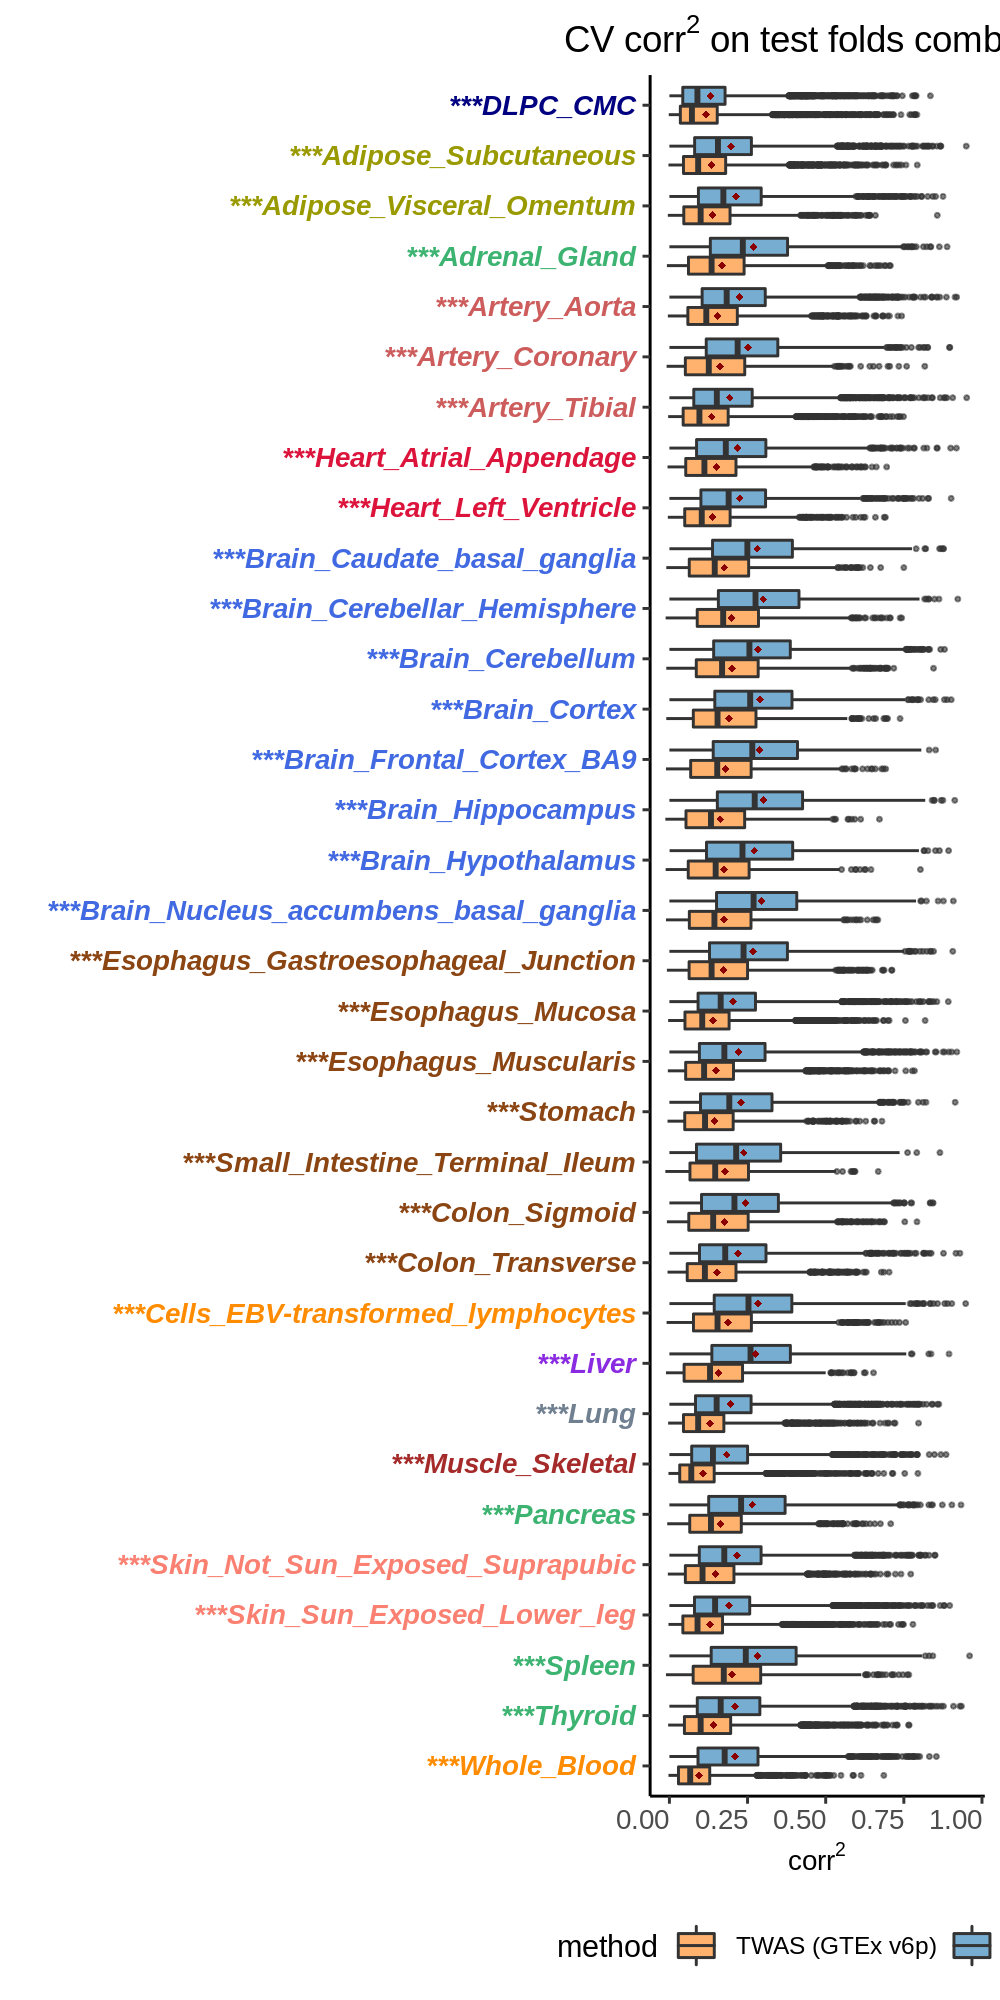

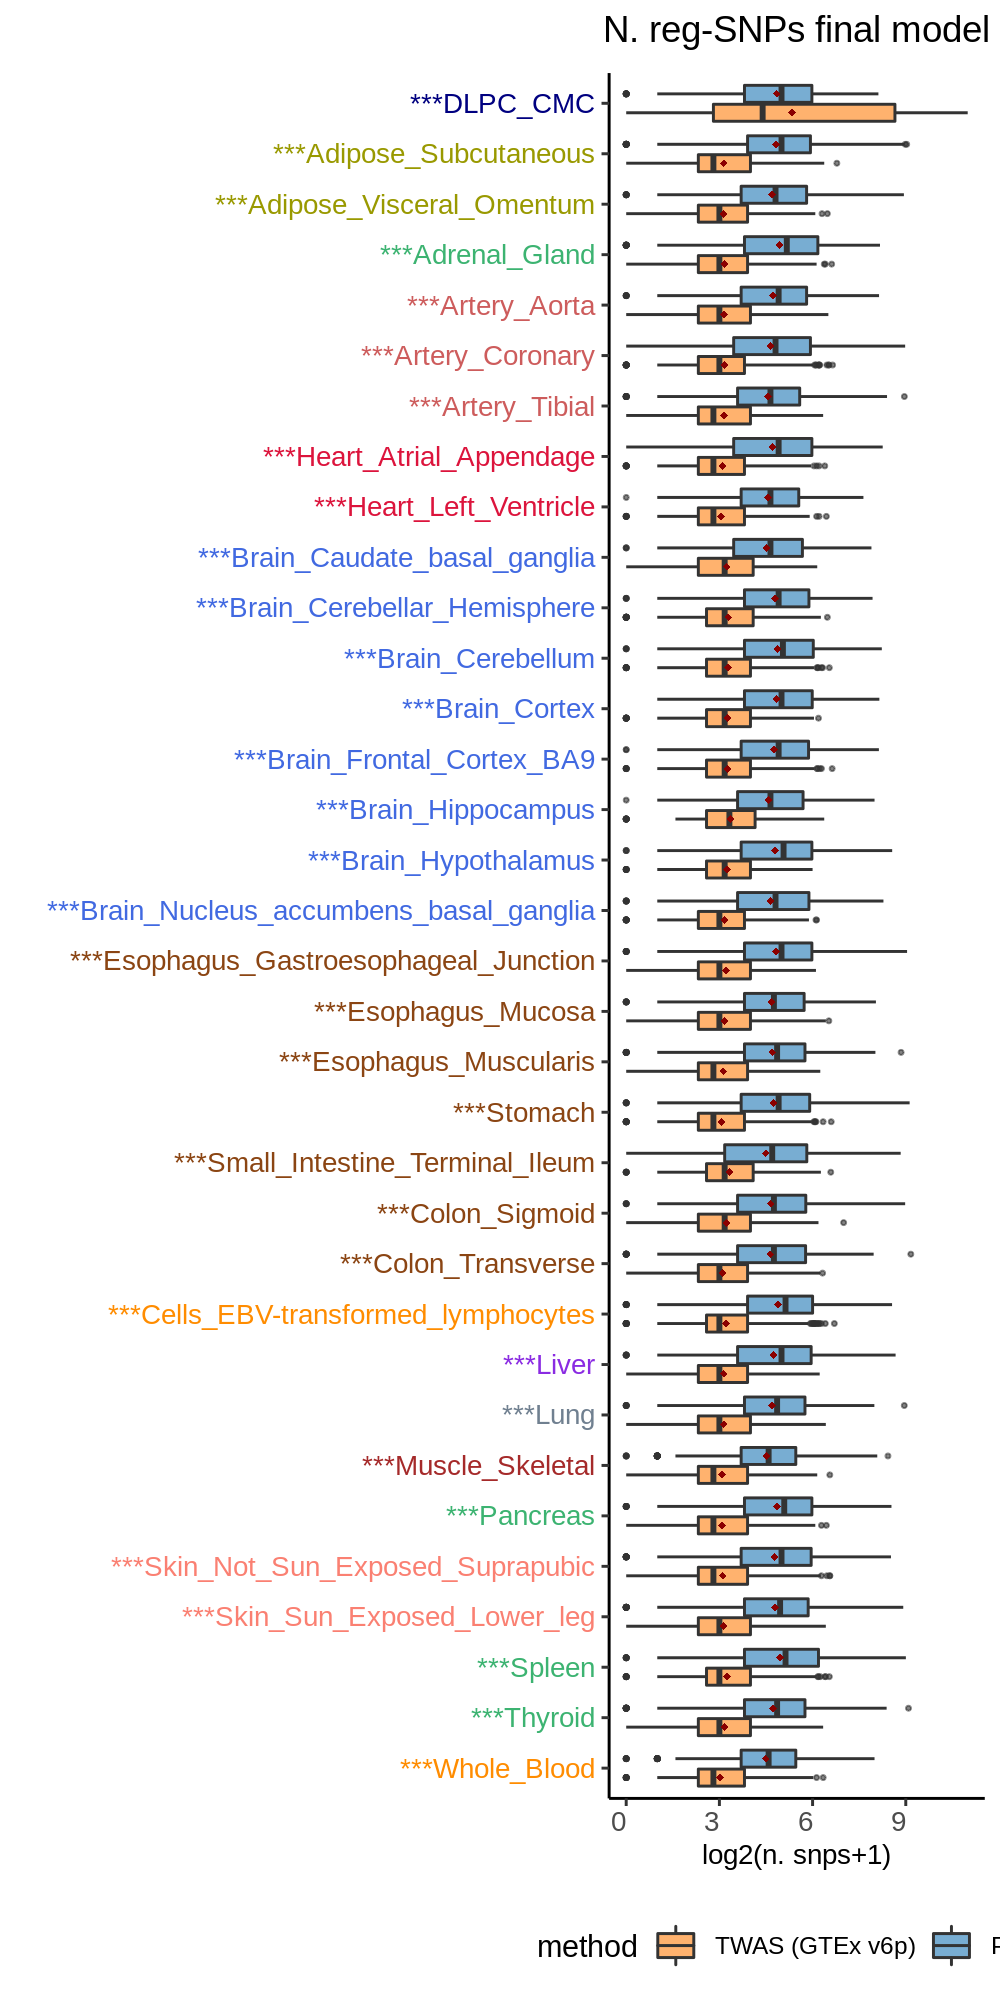

           method n_genes       type add_info
1          PriLer   16099         CV     <NA>
2 TWAS (GTEx v6p)   52792         CV    76.6%
3          PriLer   13439 n.reg-SNPs     <NA>
4 TWAS (GTEx v6p)   55452 n.reg-SNPs    80.5%


Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


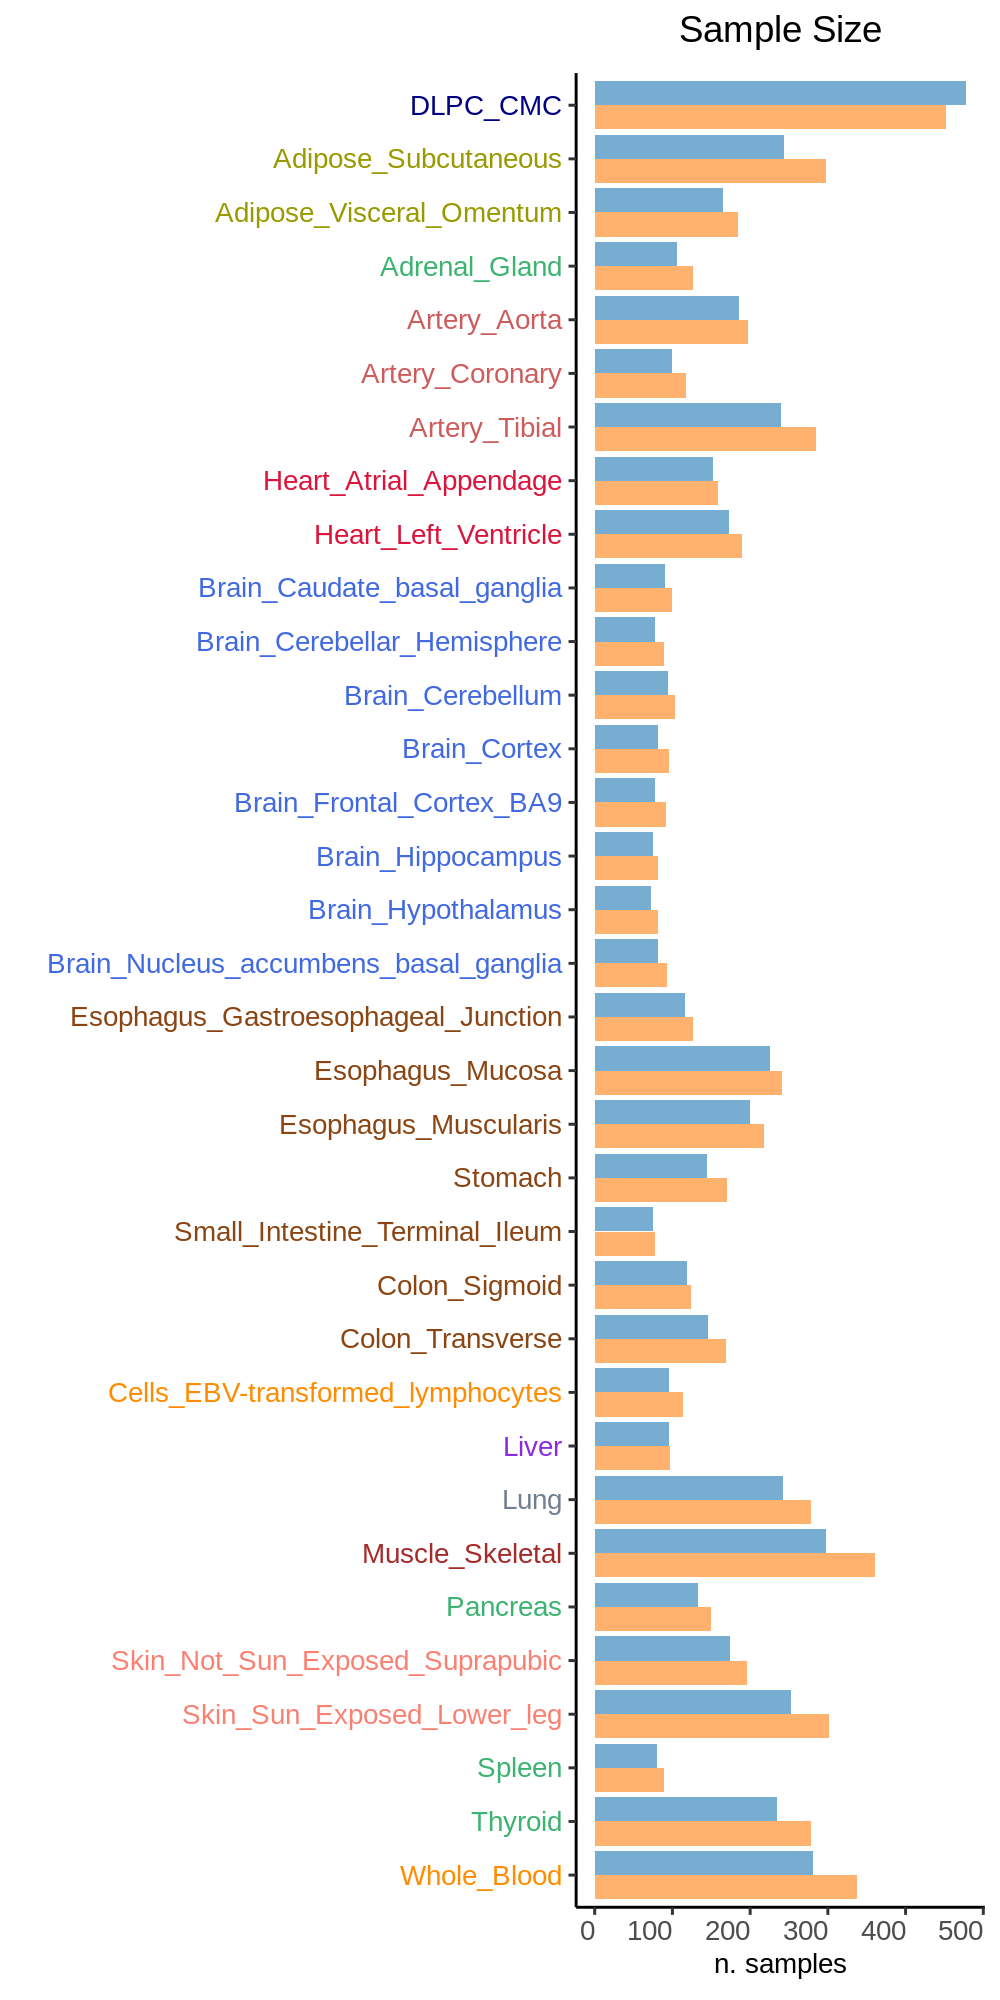

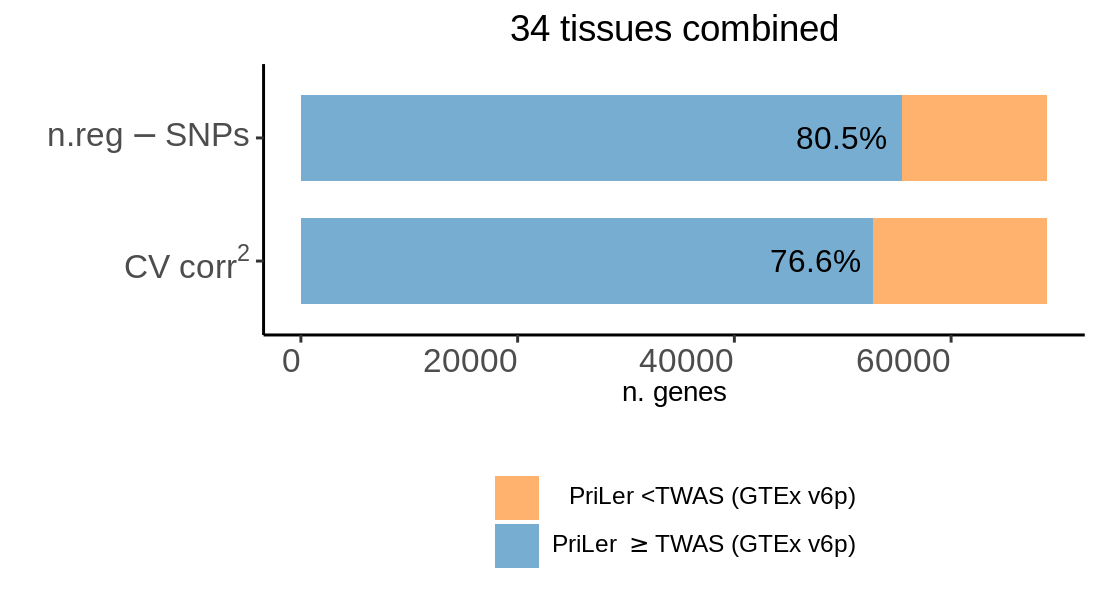

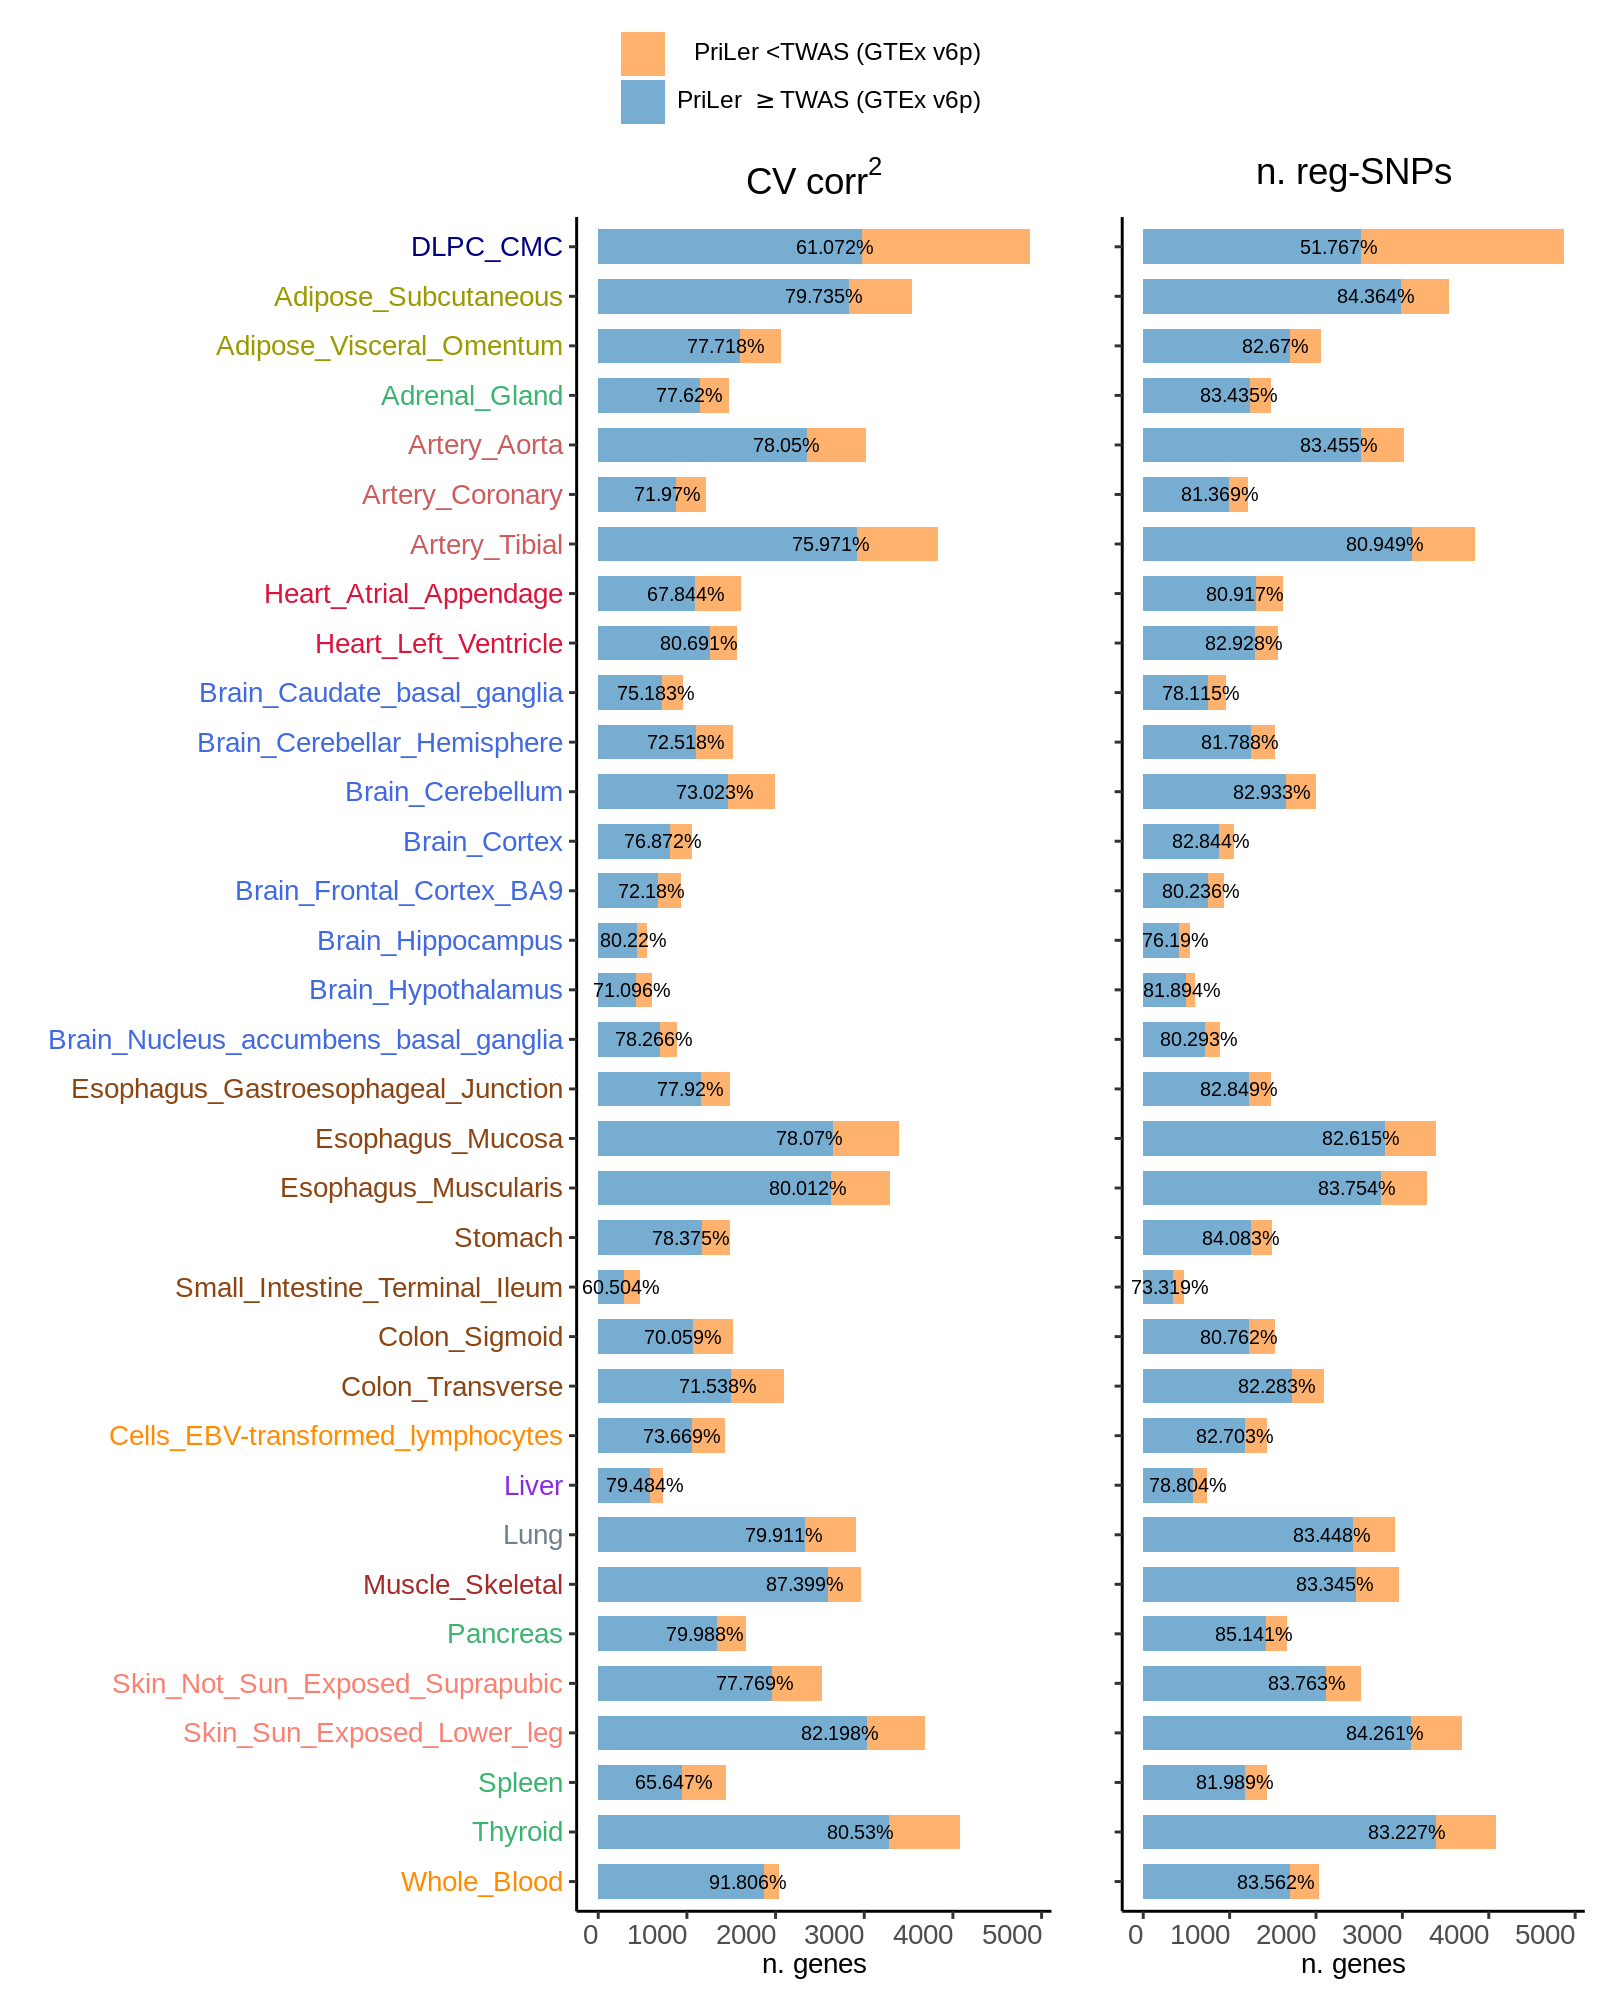

In [5]:
#### TWAS (GTEx v6p) ####
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 200)

twas_v6p <- plots_summary_comp(df_tot = df_tot_TWAS_v6p, PriLer_eval = 'test_comb_cor', other_eval = 'best.r2', 
                               other_nsnps = 'best.nsnps', other_nsnps_window = 'nsnps', 
                               other_name = 'TWAS (GTEx v6p)', other_name_save = 'TWAS_v6p', 
                               order_tissues = order_tissues, color_tissues = color_tissues, 
                               eval_title_plot =  TeX('CV $corr^2$ on test folds combined'),
                               color_other = color_other_TWAS_v6p, sampleSize_file_other = TWAS_v6p_sampleSize, 
                               outFold = outFold, plot_print=T)
twas_v6p$corr
twas_v6p$n_snps
twas_v6p$n_samples

twas_v6p_impr <- plot_n_improved(df_pl = twas_v6p$tab,
                                 other_name = 'TWAS (GTEx v6p)', 
                                 other_name_save = 'TWAS_v6p', 
                                 color_other = color_other_TWAS_v6p,
                                 outFold = outFold, color_tissues = color_tissues)

options(repr.plot.width = 5.5, repr.plot.height = 3, repr.plot.res = 200)
twas_v6p_impr$all_tissues

options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 200)
twas_v6p_impr$tissue_specific


# subset tissues:
#subset_tissues <- c('DLPC_CMC', 'Adipose_Subcutaneous', 'Heart_Left_Ventricle', 'Whole_Blood')
#plots_summary_comp(df_tot = df_tot_TWAS_v6p, subset_tissue = subset_tissues, PriLer_eval = 'test_comb_cor', other_eval = 'best.r2', other_nsnps = 'best.nsnps', other_nsnps_window = 'nsnps', 
#                   other_name = 'TWAS (GTEx v6p)', other_name_save = 'TWAS_v6p_subsetTissues', order_tissues = rev(1:4), color_tissues = color_tissues[c(1, 26, 33,34)], 
#                   eval_title_plot =  TeX('CV $corr^2$ on test folds combined'), color_other = color_other_TWAS_v6p, sampleSize_file_other = TWAS_v6p_sampleSize, width_val = 5, height_val = 3.5, 
#                  outFold = outFold)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


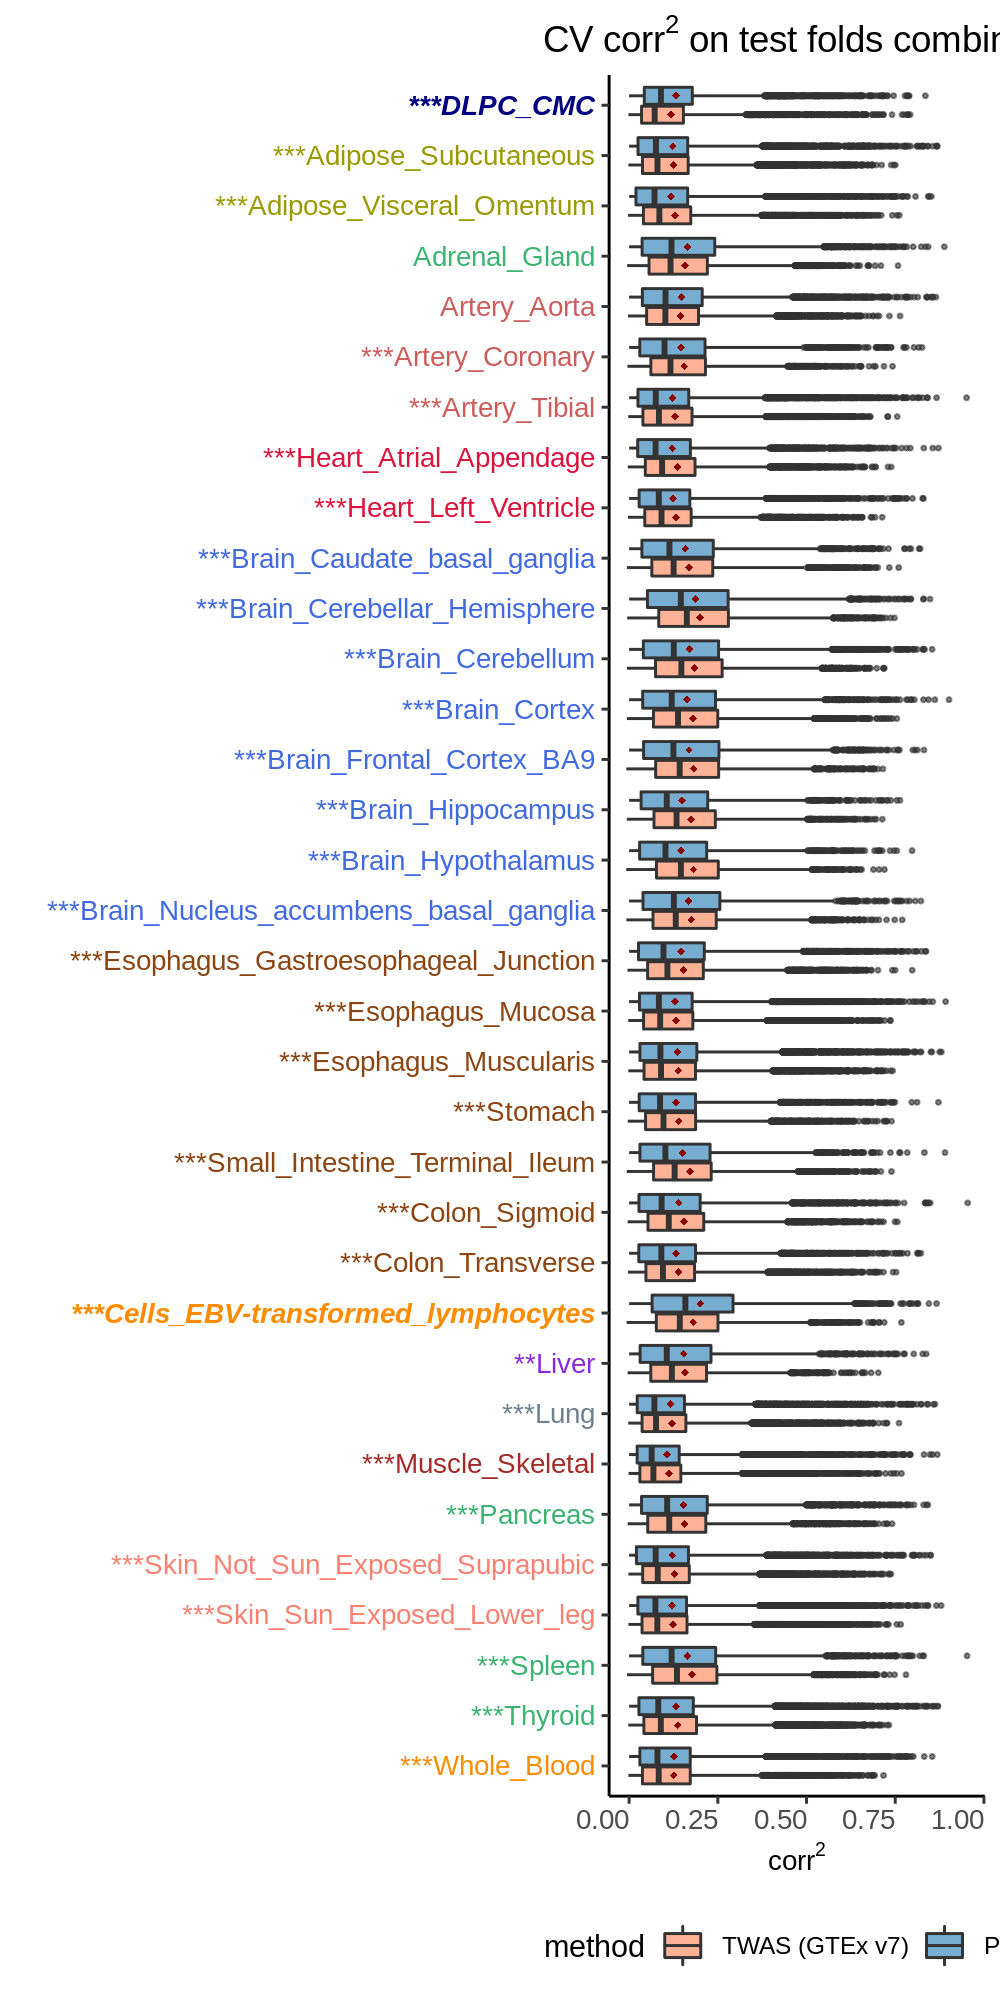

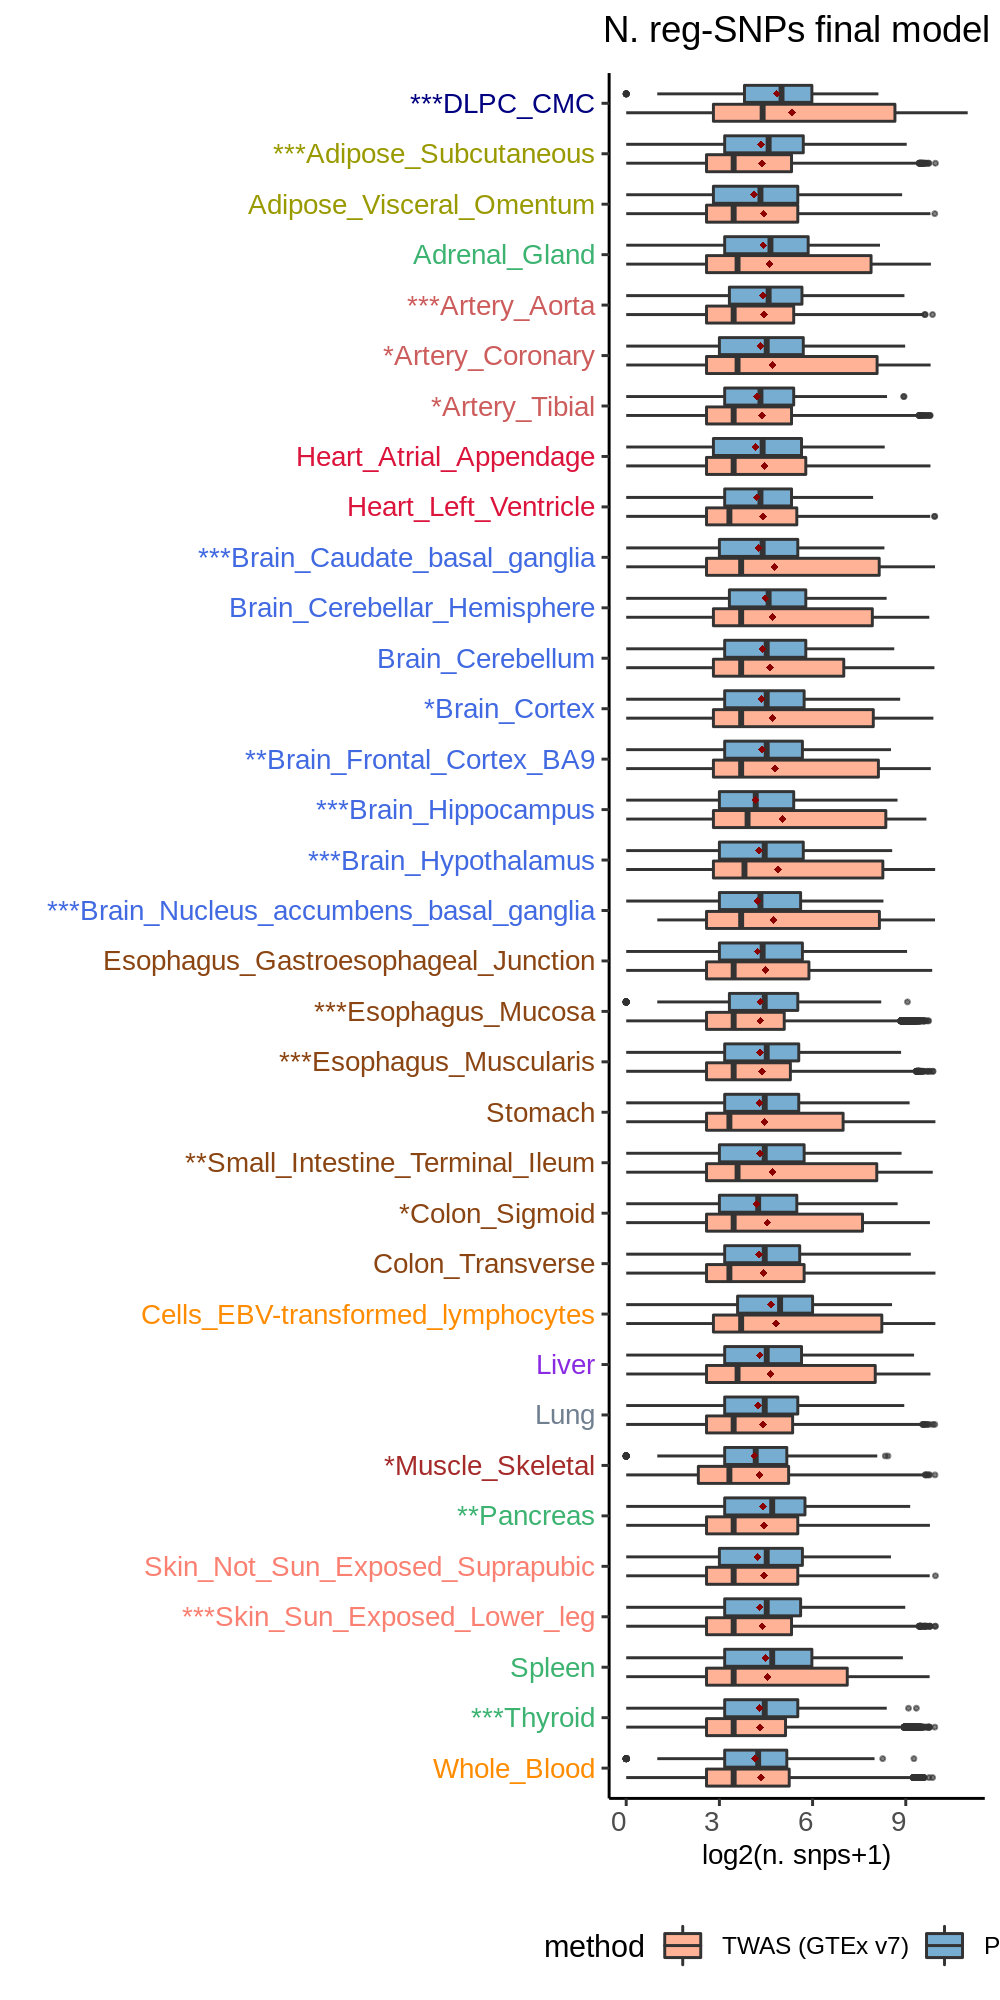

          method n_genes       type add_info
1         PriLer  101059         CV     <NA>
2 TWAS (GTEx v7)   74993         CV    42.6%
3         PriLer   73847 n.reg-SNPs     <NA>
4 TWAS (GTEx v7)  102205 n.reg-SNPs    58.1%


Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


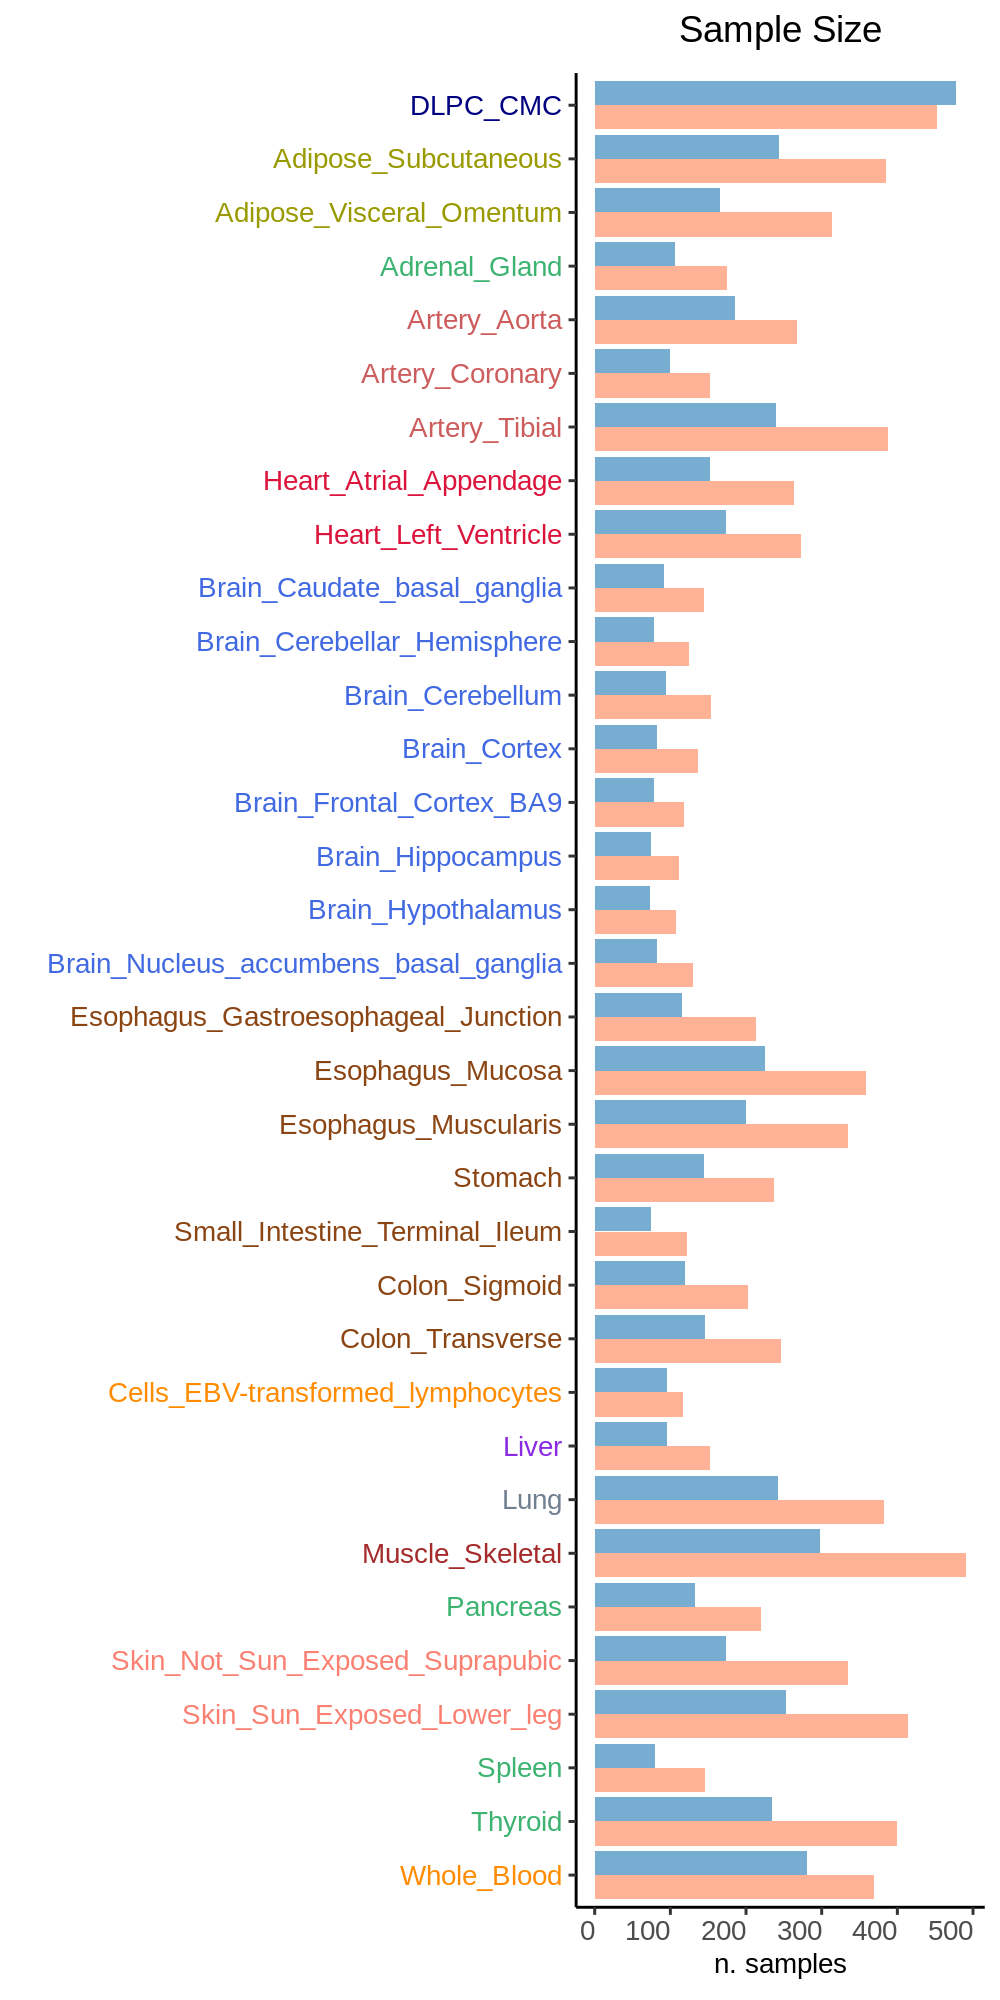

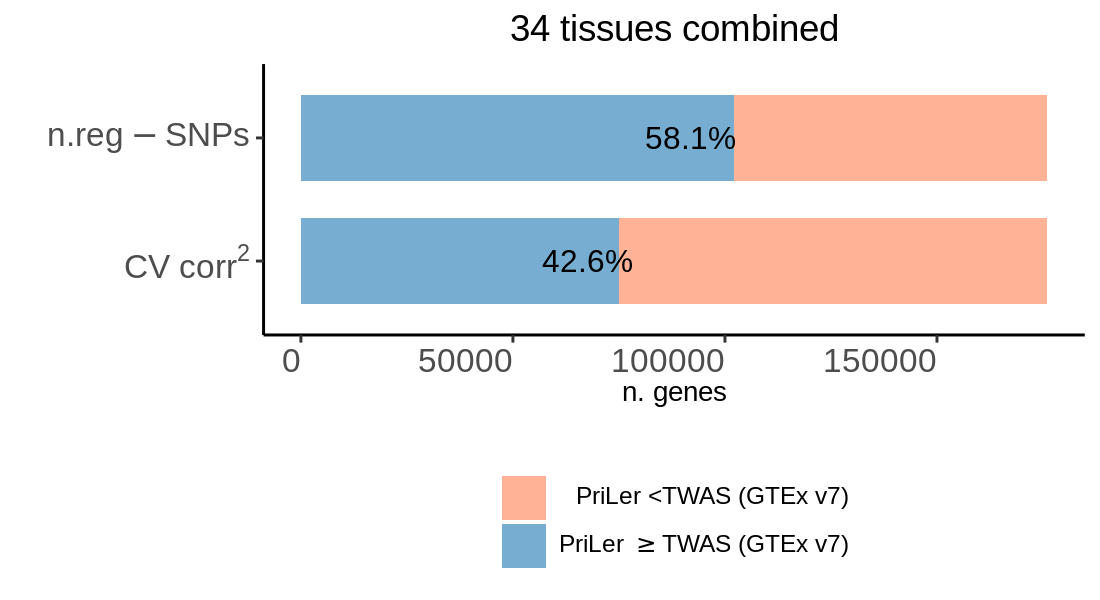

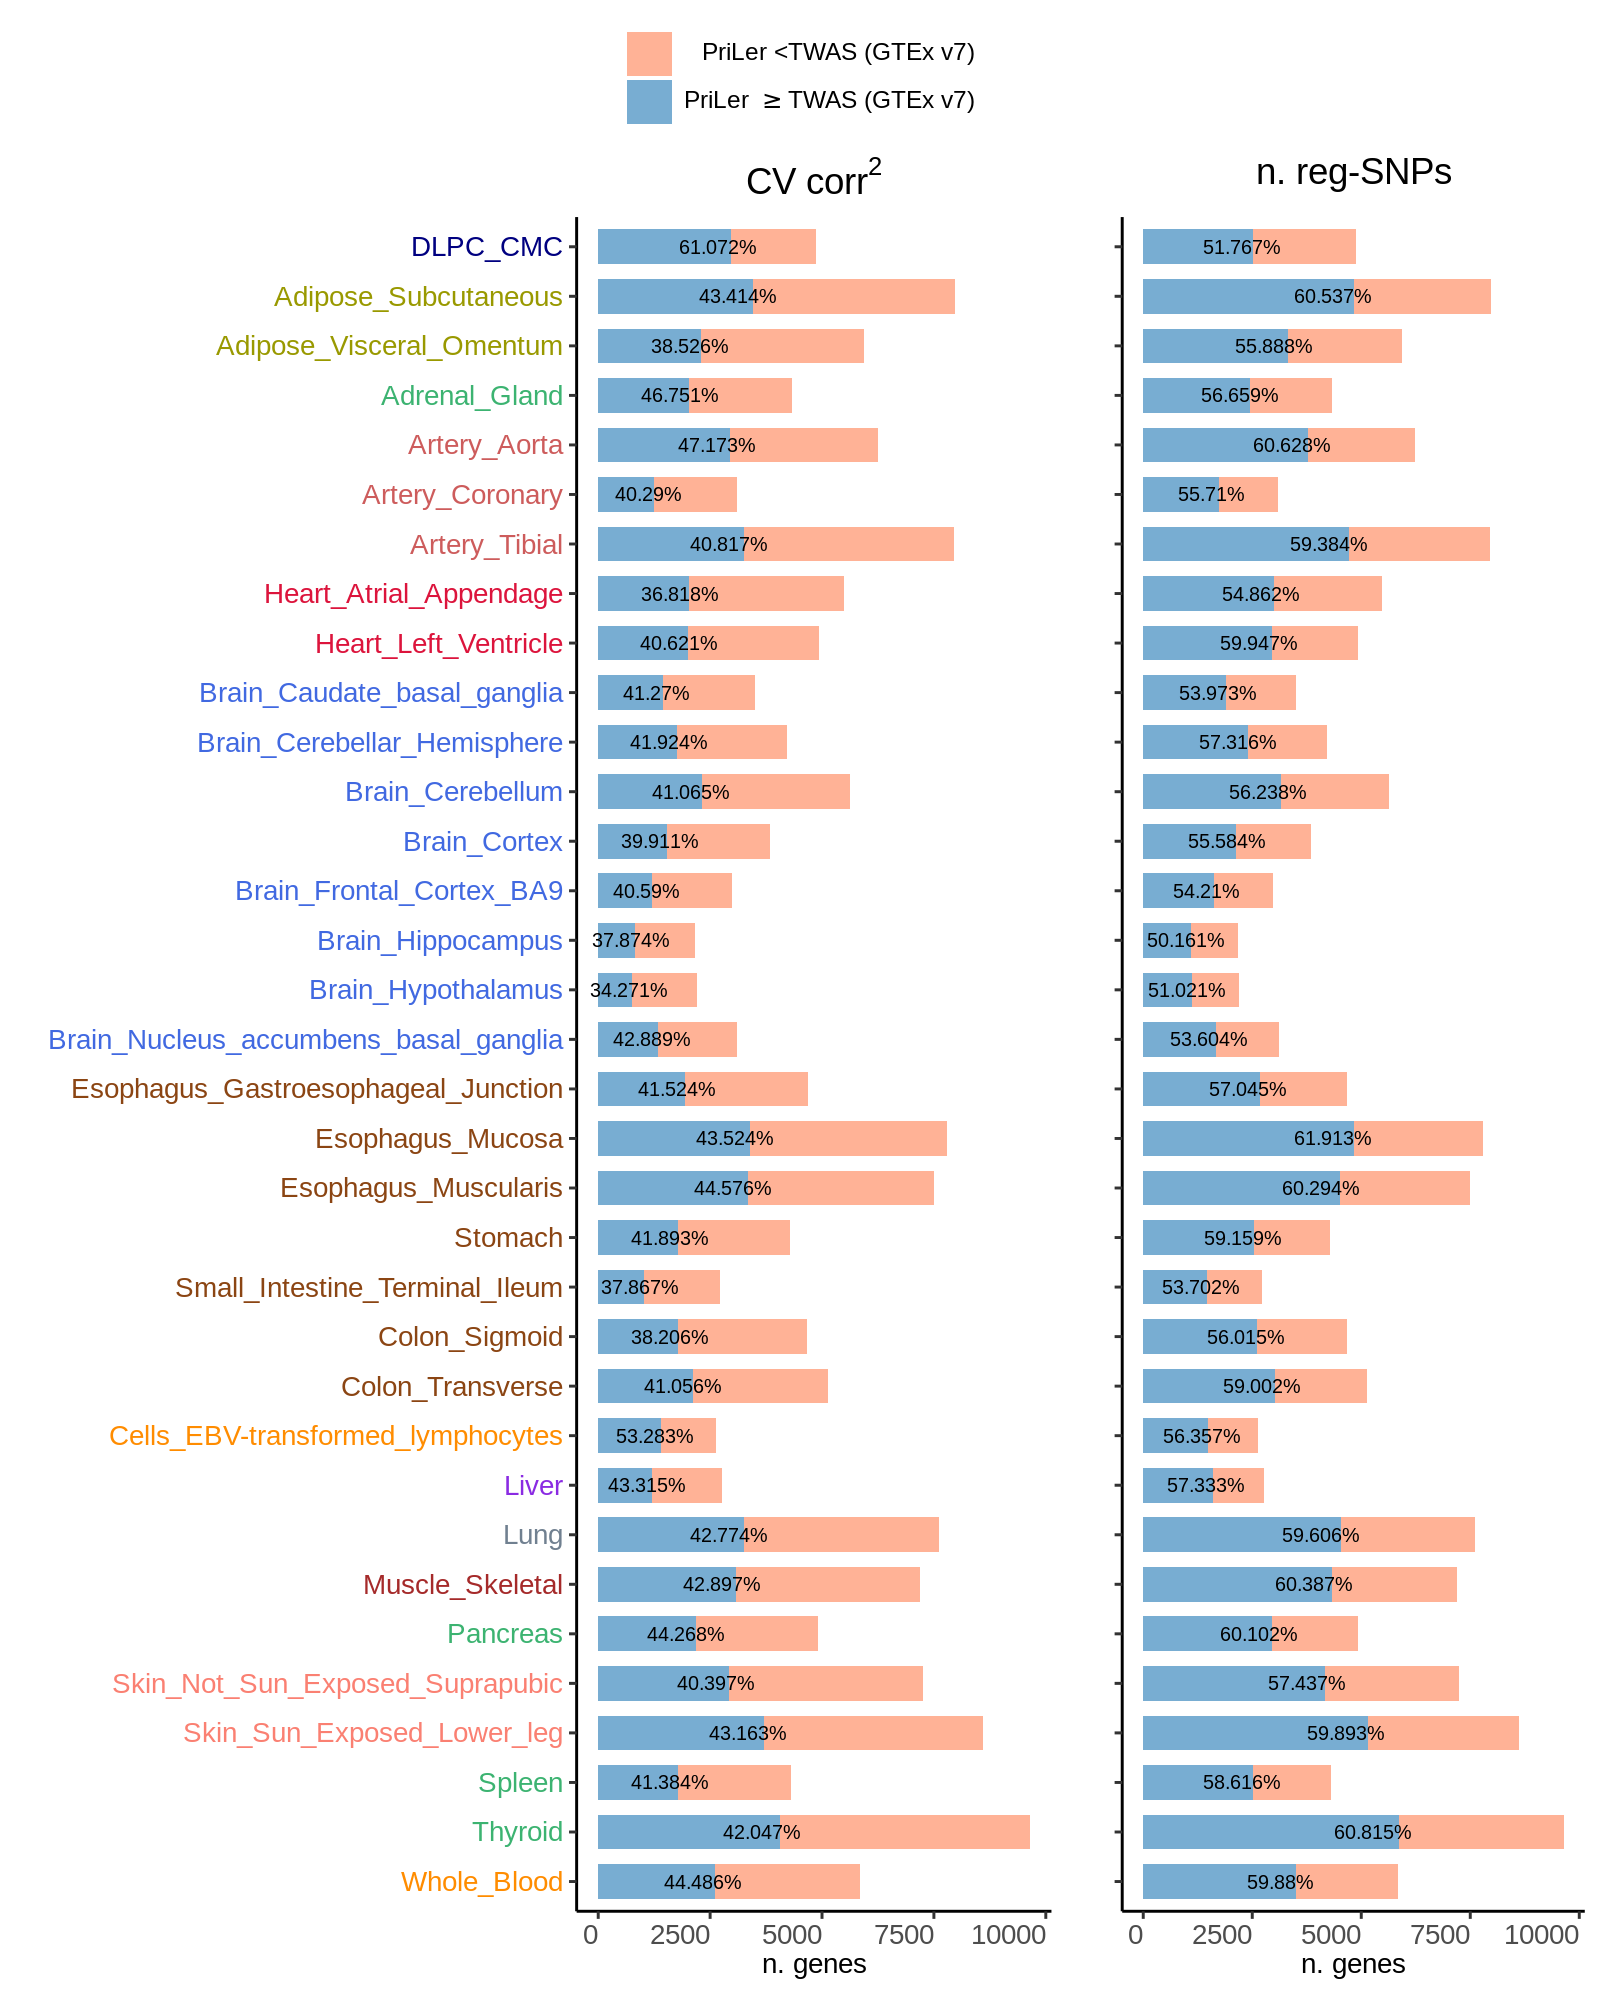

In [6]:
#### TWAS (GTEx v7) ####
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 200)

twas_v7 <- plots_summary_comp(df_tot = df_tot_TWAS_v7, PriLer_eval = 'test_comb_cor', other_eval = 'best.r2', other_nsnps = 'best.nsnps', other_nsnps_window = 'nsnps', 
                   other_name = 'TWAS (GTEx v7)', other_name_save = 'TWAS_v7', order_tissues = order_tissues, color_tissues = color_tissues, 
                   eval_title_plot =  TeX('CV $corr^2$ on test folds combined'), color_other = color_other_TWAS_v7, sampleSize_file_other = TWAS_v7_sampleSize, 
                  outFold = outFold, plot_print = T)

twas_v7$corr
twas_v7$n_snps
twas_v7$n_samples

twas_v7_impr <- plot_n_improved(df_pl = twas_v7$tab,
                                 other_name = 'TWAS (GTEx v7)', 
                                 other_name_save = 'TWAS_v7', 
                                 color_other = color_other_TWAS_v7,
                                 outFold = outFold, color_tissues = color_tissues)

options(repr.plot.width = 5.5, repr.plot.height = 3, repr.plot.res = 200)
twas_v7_impr$all_tissues

options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 200)
twas_v7_impr$tissue_specific




Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


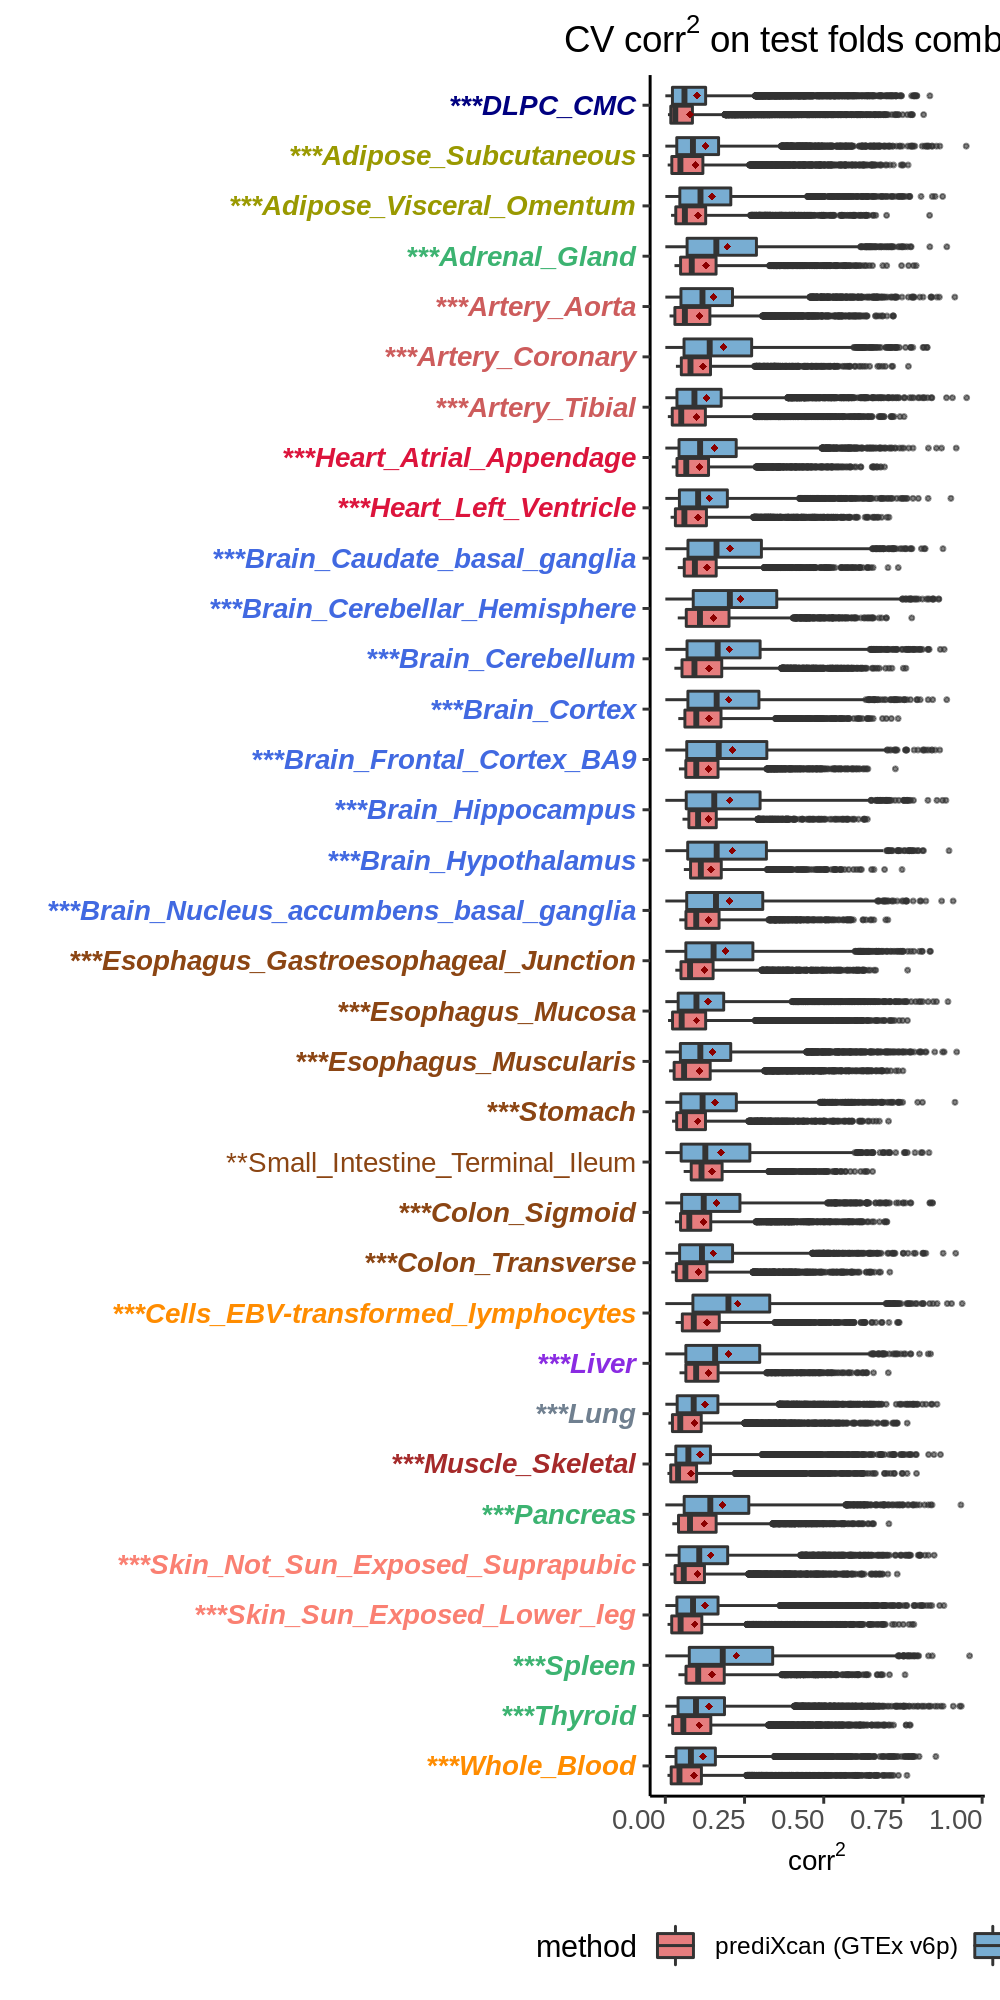

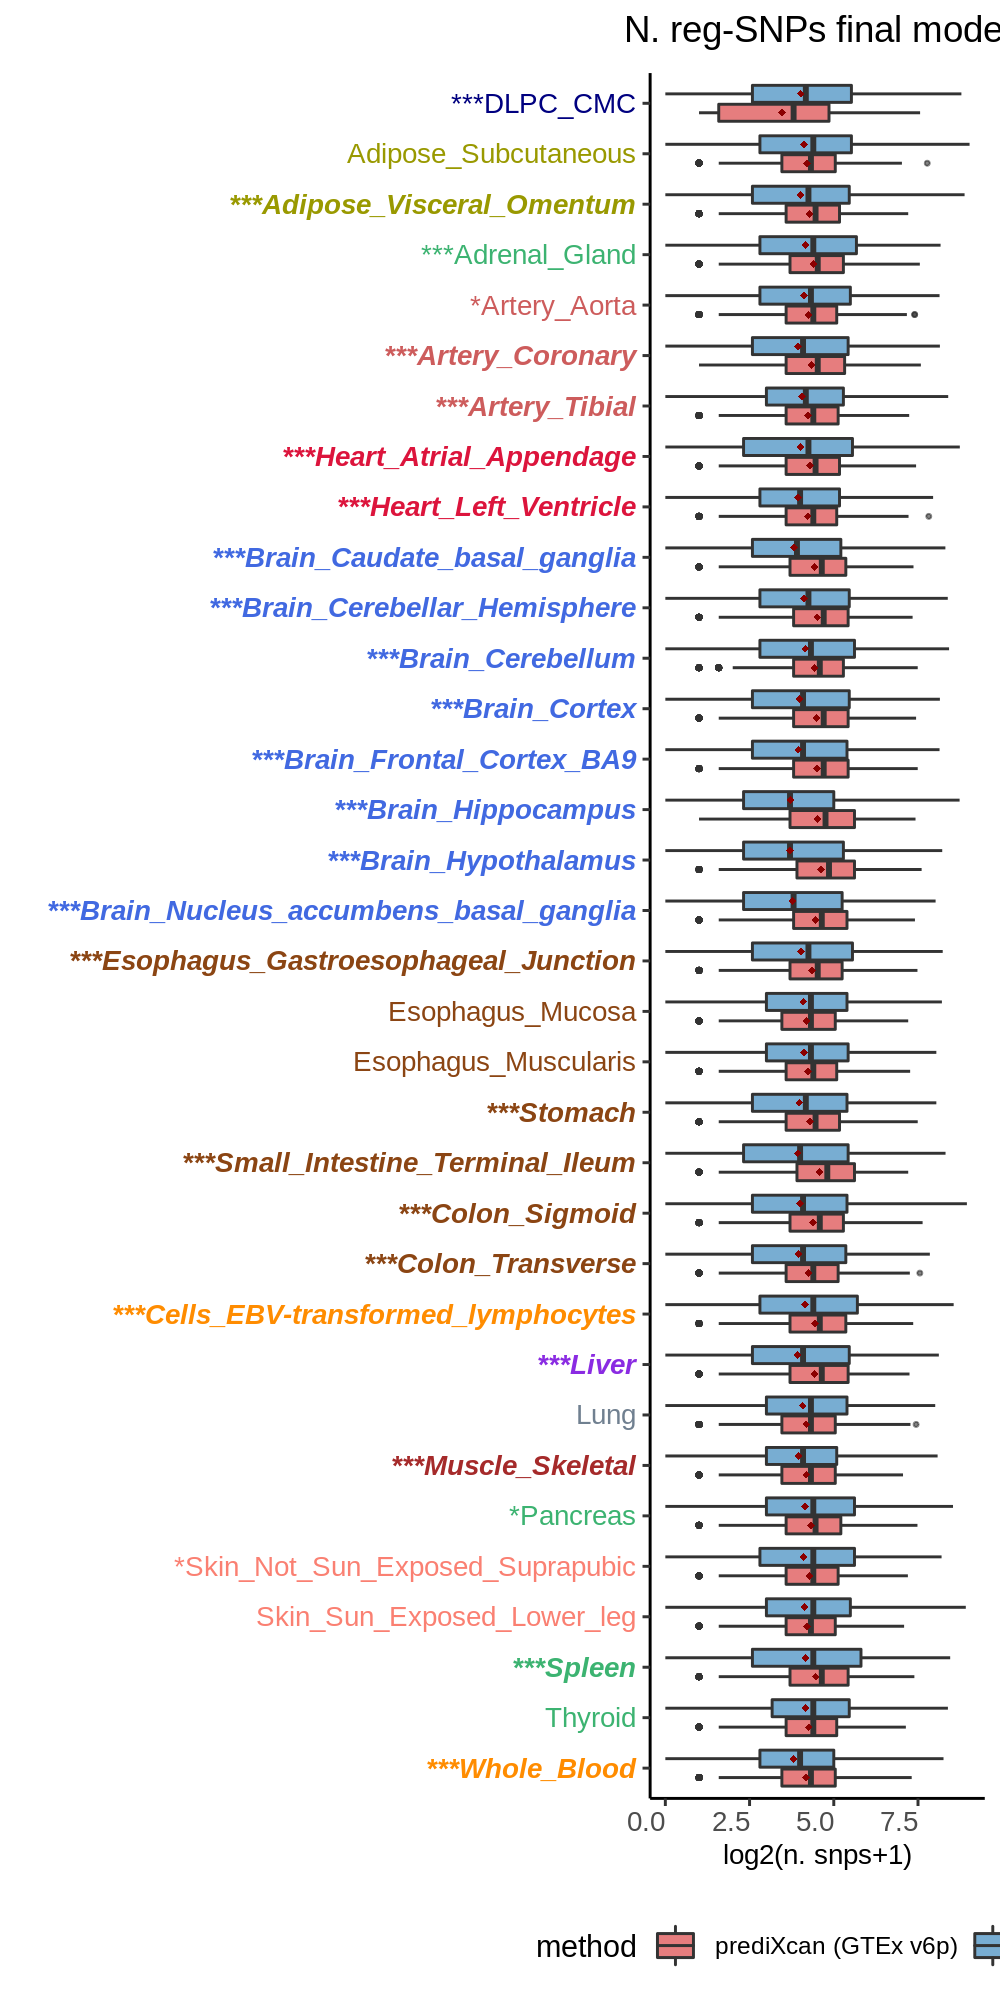

                method n_genes       type add_info
1               PriLer   56044         CV     <NA>
2 prediXcan (GTEx v6p)  102205         CV    64.6%
3               PriLer   78960 n.reg-SNPs     <NA>
4 prediXcan (GTEx v6p)   79289 n.reg-SNPs    50.1%


Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 34 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


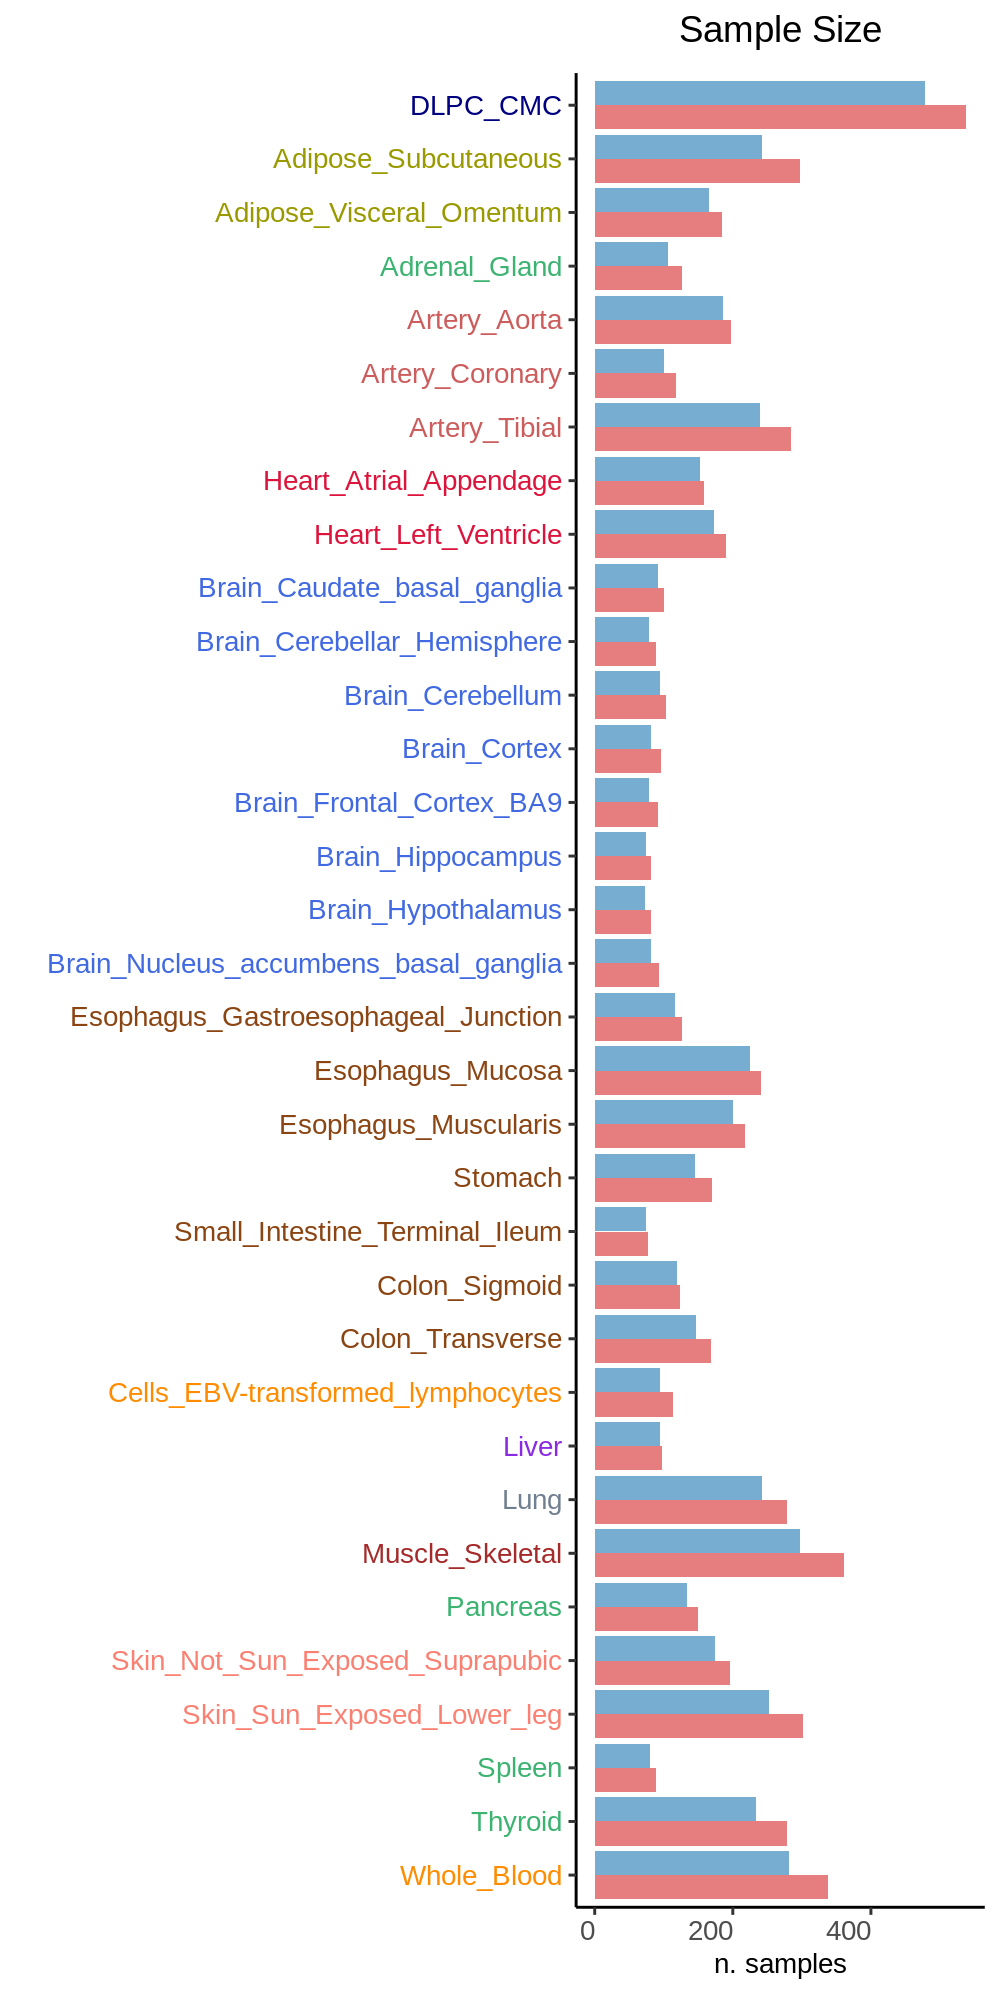

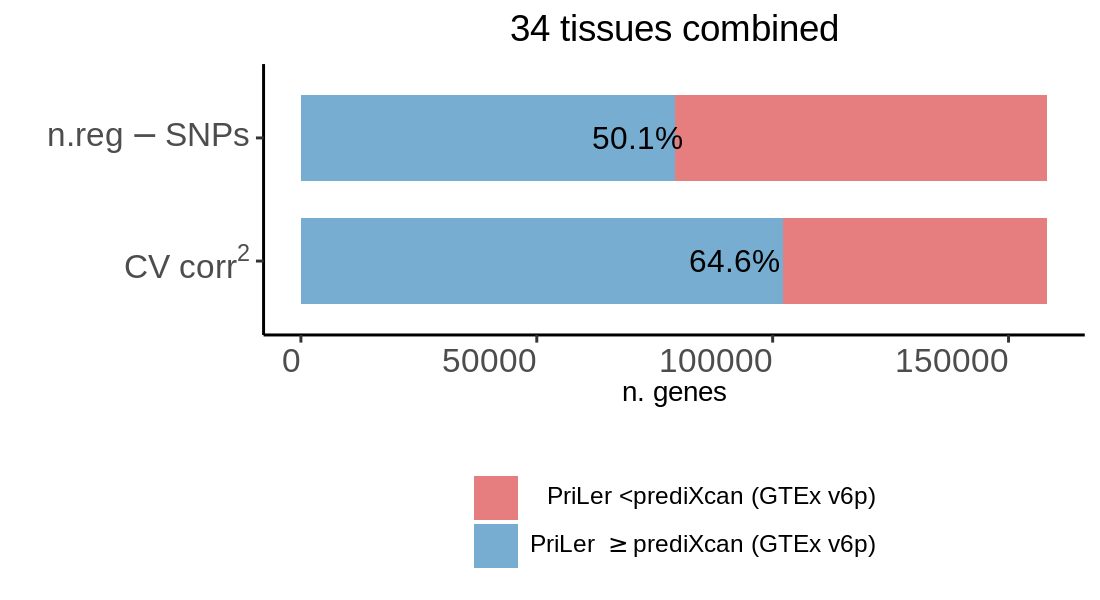

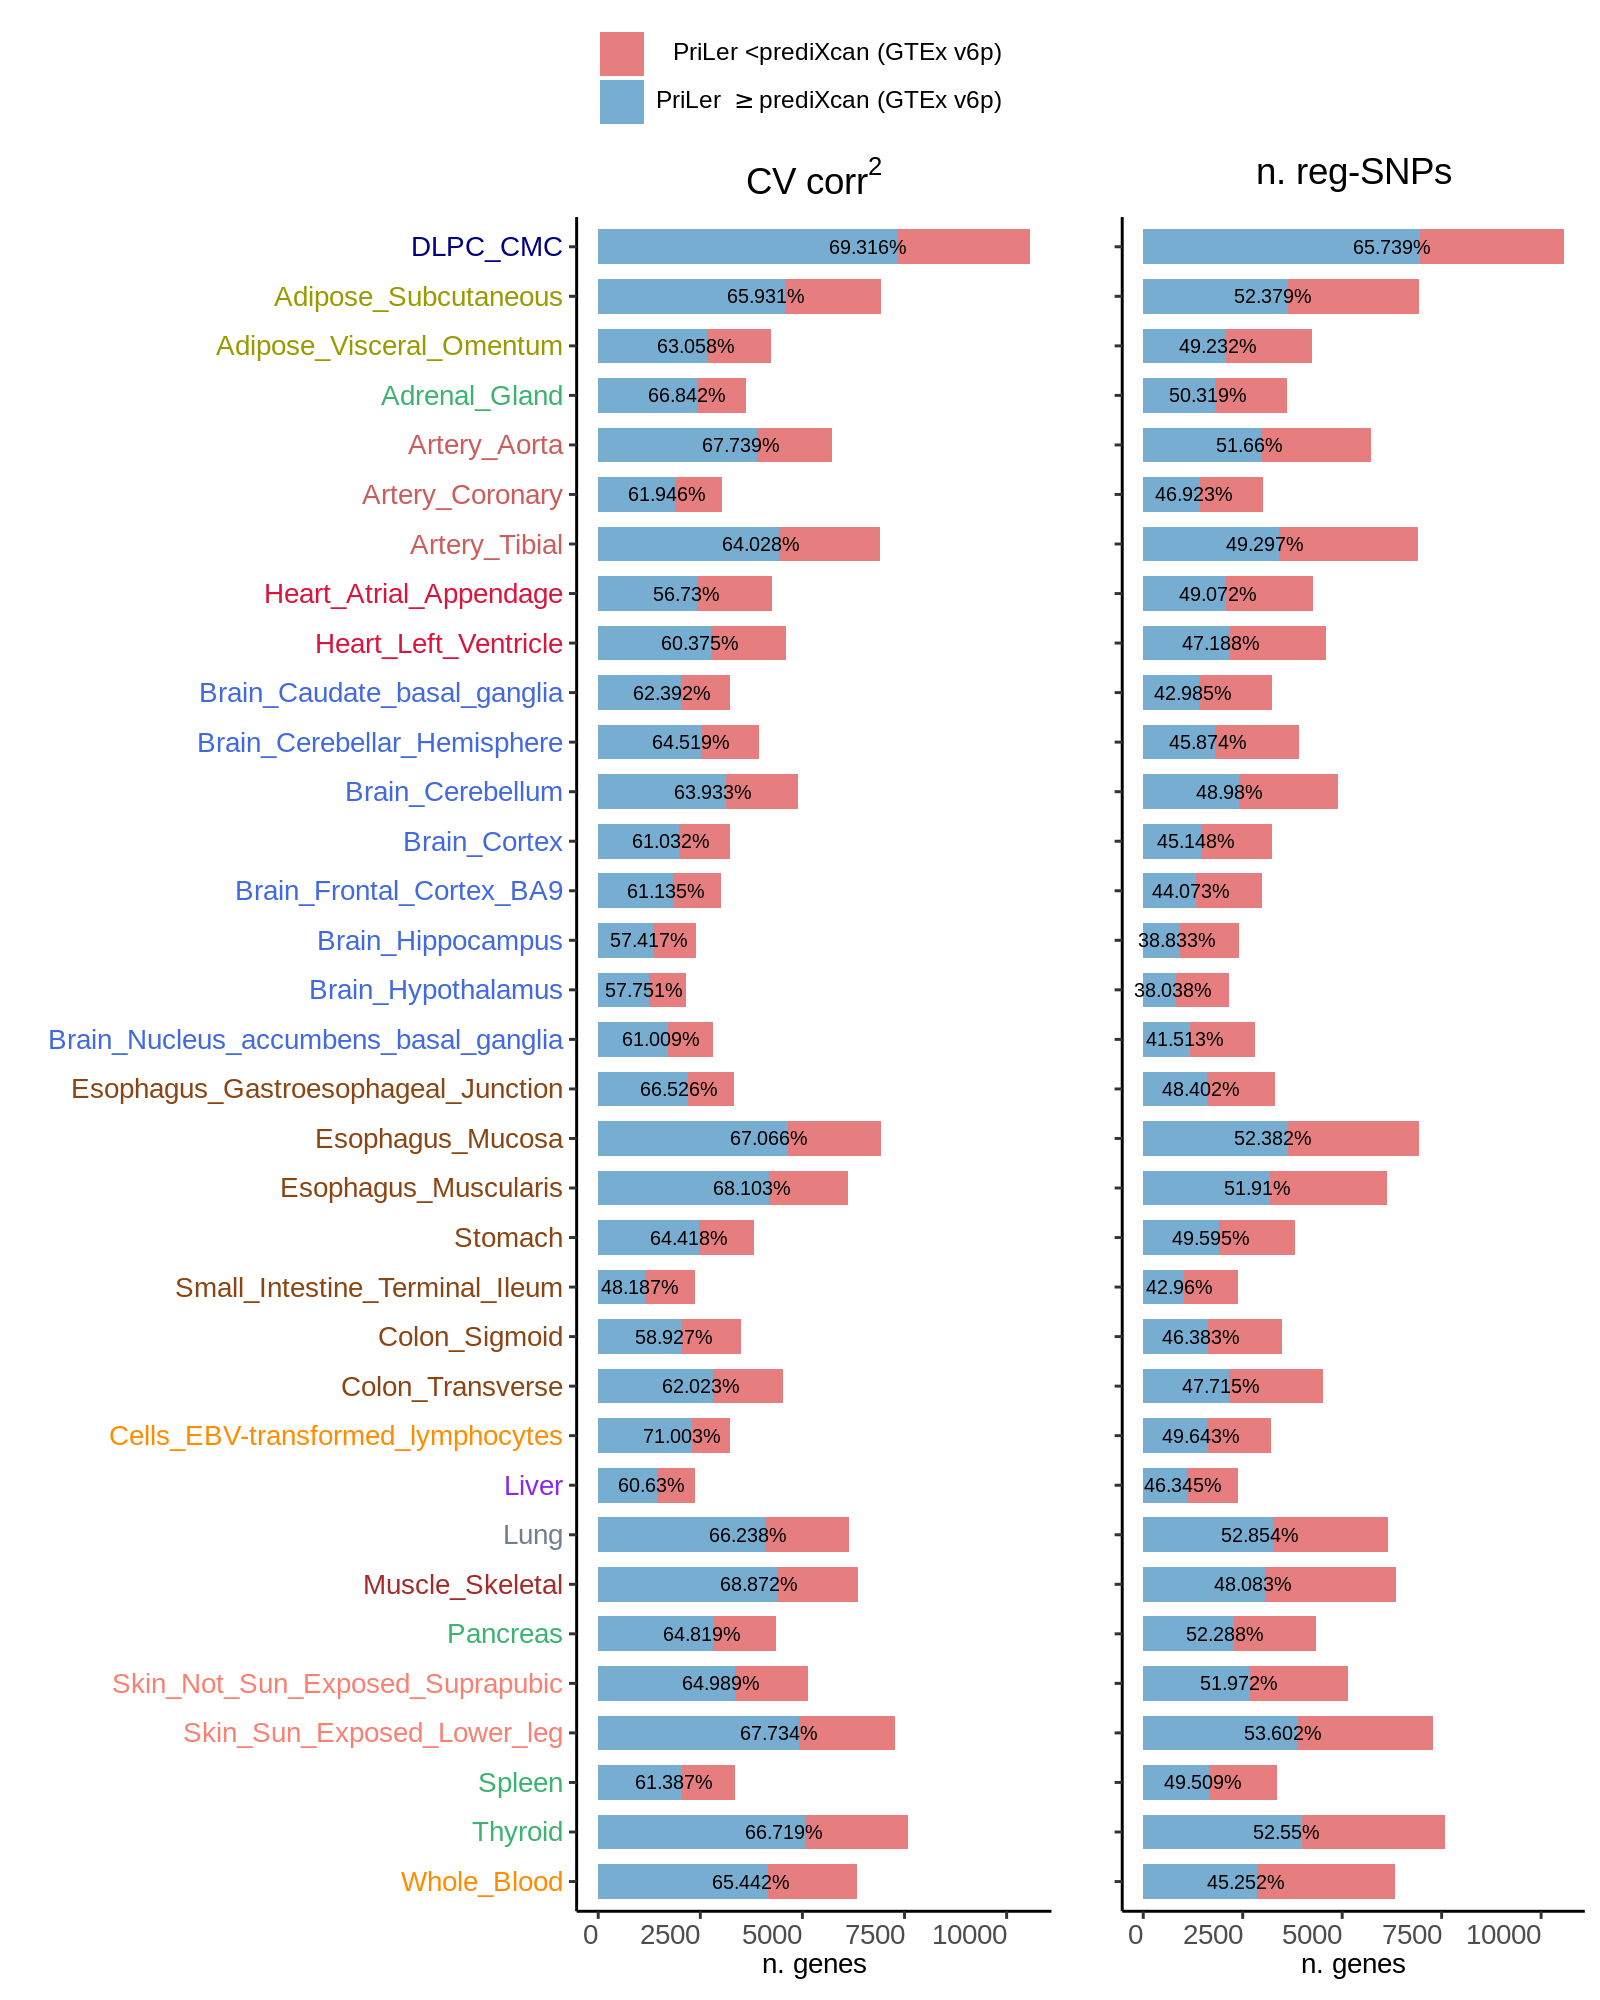

In [7]:
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 200)

#### prediXcan (GTEx v6p)
predixcan_v6p <- plots_summary_comp(df_tot = df_tot_predixOld, PriLer_eval = 'test_comb_cor', 
                   other_eval = 'pred.perf.R2', other_nsnps = 'n.snps.in.model',
                   other_name = 'prediXcan (GTEx v6p)', other_name_save = 'prediXcan_v6p', 
                   order_tissues = order_tissues, color_tissues = color_tissues, 
                   eval_title_plot =  TeX('CV $corr^2$ on test folds combined'), 
                   color_other = color_other_prediXcan_v6p, sampleSize_file_other = prediXcanOld_sampleSize, 
                  outFold = outFold, plot_print = T)

predixcan_v6p$corr
predixcan_v6p$n_snps
predixcan_v6p$n_samples

predixcan_v6p_impr <- plot_n_improved(df_pl = predixcan_v6p$tab,
                                 other_name = 'prediXcan (GTEx v6p)', 
                                 other_name_save = 'prediXcan_v6p', 
                                 color_other = color_other_prediXcan_v6p,
                                 outFold = outFold, color_tissues = color_tissues)

options(repr.plot.width = 5.5, repr.plot.height = 3, repr.plot.res = 200)
predixcan_v6p_impr$all_tissues

options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 200)
predixcan_v6p_impr$tissue_specific


## subset tissues:
#subset_tissues <- c('DLPC_CMC', 'Adipose_Subcutaneous', 'Heart_Left_Ventricle', 'Whole_Blood')
#plots_summary_comp(df_tot = df_tot_predixOld, subset_tissue = subset_tissues, PriLer_eval = 'test_comb_cor', other_eval = 'pred.perf.R2', other_nsnps = 'n.snps.in.model', 
#                   other_name = 'prediXcan (GTEx v6p)', other_name_save = 'prediXcan_v6p_subsetTissues', order_tissues = rev(1:4), color_tissues = color_tissues[c(1, 26, 33,34)], 
#                   eval_title_plot =  TeX('CV $corr^2$ on test folds combined'), color_other = color_other_prediXcan_v6p, sampleSize_file_other = prediXcanOld_sampleSize, width_val = 5, height_val = 3.5, 
#                  outFold = outFold)



In [26]:
## specific for Small Intestine, show significance

library(rstatix)
df_tot <- df_tot_predixOld
PriLer_eval = 'test_comb_cor'
other_eval = 'pred.perf.R2'
other_nsnps = 'n.snps.in.model'
other_name = 'prediXcan (GTEx v6p)'
subset_tissue = 'Small_Intestine_Terminal_Ileum'
# remove test NA
df_tot_noNA <- df_tot[!is.na(df_tot[, PriLer_eval]) & !is.na(df_tot$n_snps),]
if(!is.na(subset_tissue)){
    df_tot_noNA <- df_tot_noNA[df_tot_noNA$tissue %in% subset_tissue, ]
}
df_pl <- data.frame(corr2 = c(df_tot_noNA[, PriLer_eval]^2, df_tot_noNA[, other_eval]), nsnps = c(df_tot_noNA$n_snps, df_tot_noNA[,other_nsnps]))

df_pl$tissue <- rep(df_tot_noNA$tissue,2)
df_pl$method <-  c(rep('PriLer',nrow(df_tot_noNA)), rep(other_name, nrow(df_tot_noNA)))
  
df_pl$log_nspns <- log2(df_pl$nsnps+1) 
names_t <- unique(df_pl$tissue)
df_pl$tissue <- factor(df_pl$tissue, levels = names_t[order_tissues])
df_pl$method <- factor(df_pl$method, levels = rev(c('PriLer', other_name)))
  
wilcox_test(data = df_pl, formula = corr2~method, paired = T, detailed = T)
median(df_pl$corr2[df_pl$method == 'PriLer']-df_pl$corr2[df_pl$method != 'PriLer'])

estimate    .y.   group1               group2 n1   n2   statistic p      
1 -0.01326452 corr2 prediXcan (GTEx v6p) PriLer 2372 2372 1265641   2.2e-05
  conf.low    conf.high    method   alternative
1 -0.01960236 -0.007020406 Wilcoxon two.sided

[1] -0.005156165

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


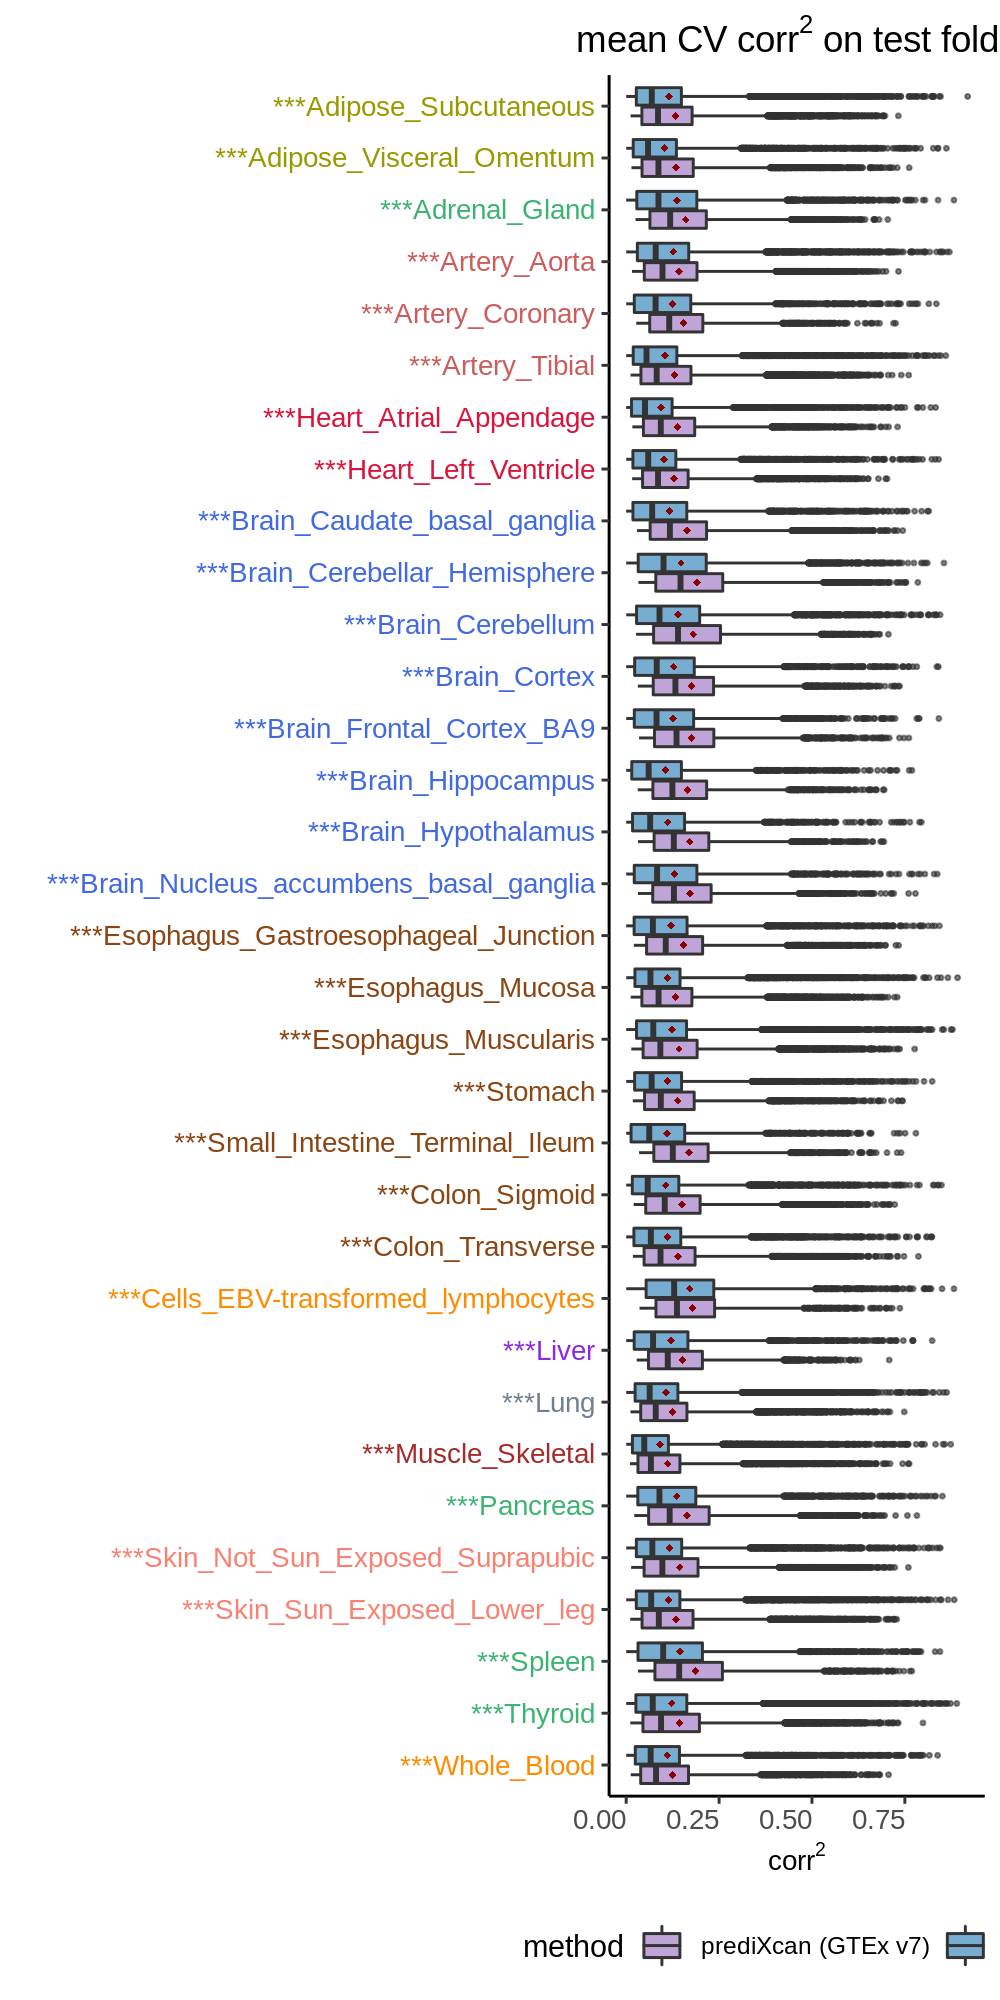

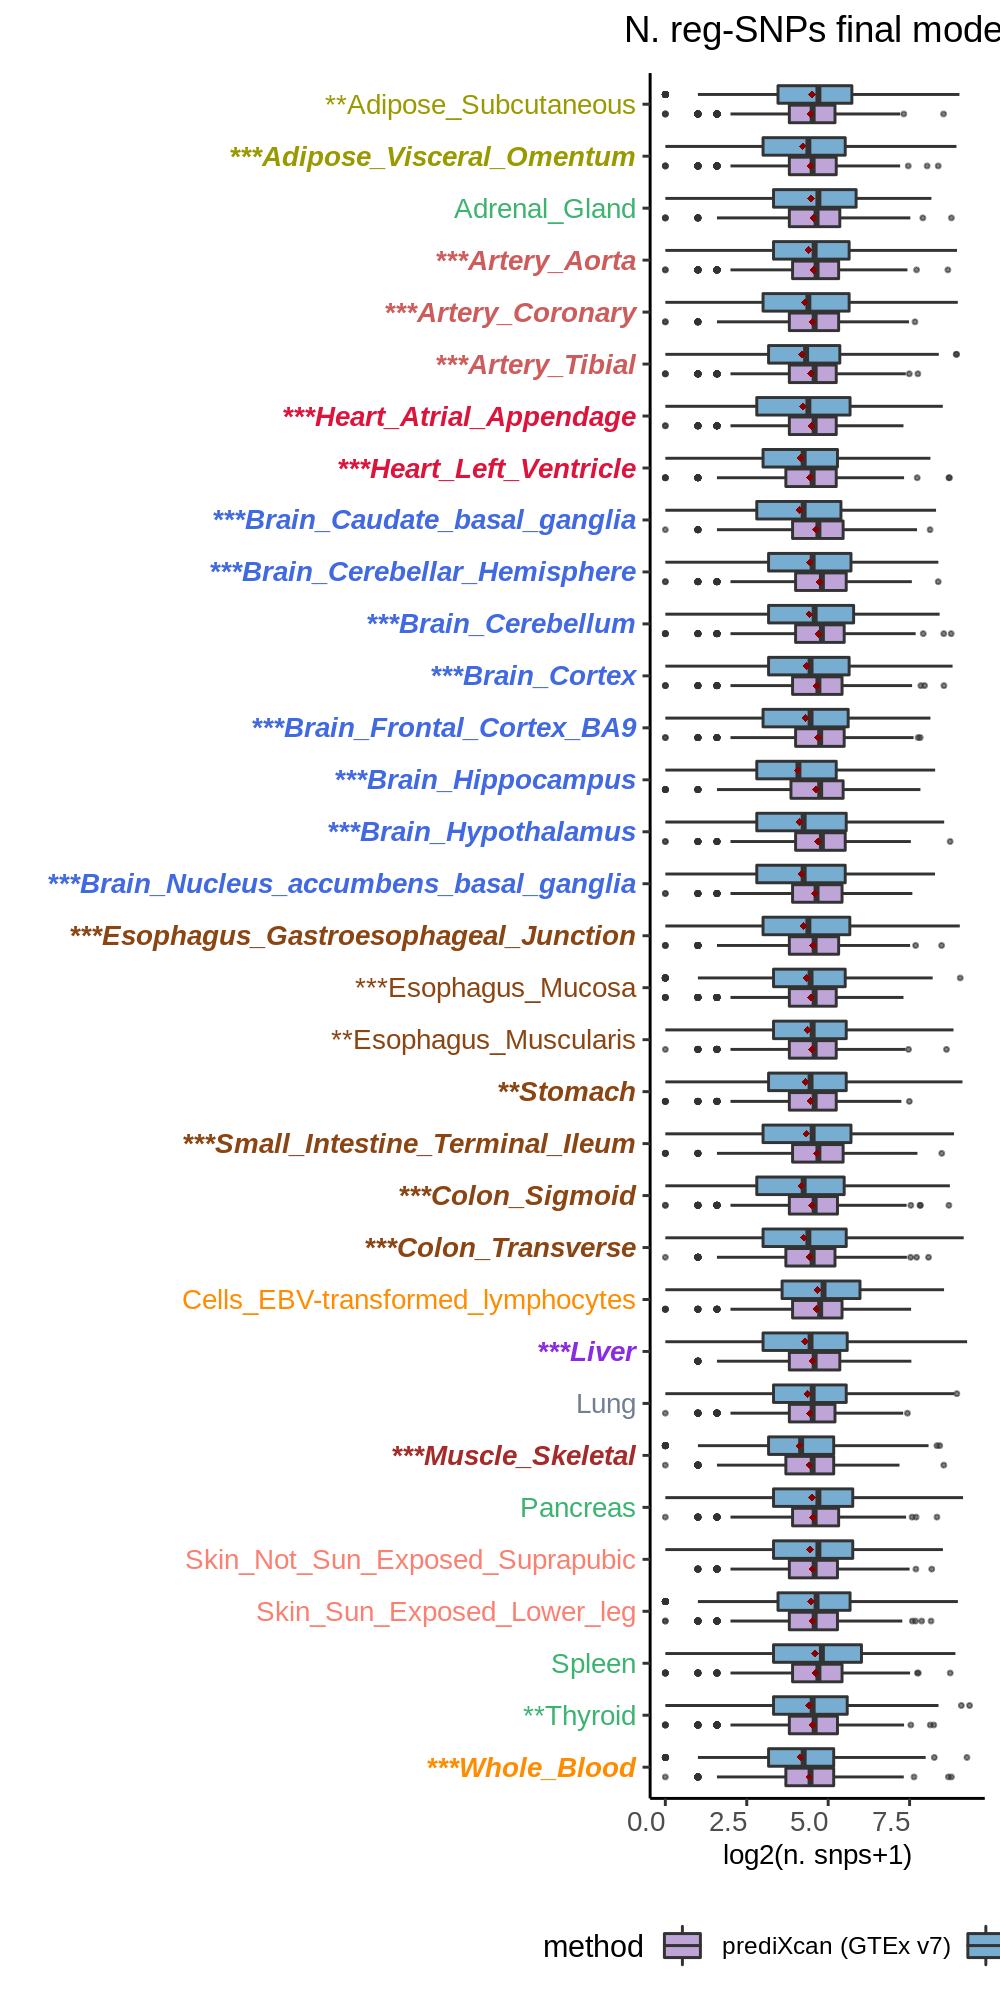

               method n_genes       type add_info
1              PriLer  109493         CV     <NA>
2 prediXcan (GTEx v7)   47745         CV    30.4%
3              PriLer   80508 n.reg-SNPs     <NA>
4 prediXcan (GTEx v7)   76730 n.reg-SNPs    48.8%


Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 33 rows containing missing values (geom_text).”
Warning message:
“Removed 33 rows containing missing values (geom_text).”
Warning message:
“Removed 33 rows containing missing values (geom_text).”
Warning message:
“Removed 2 rows containing missing values (geom_text).”


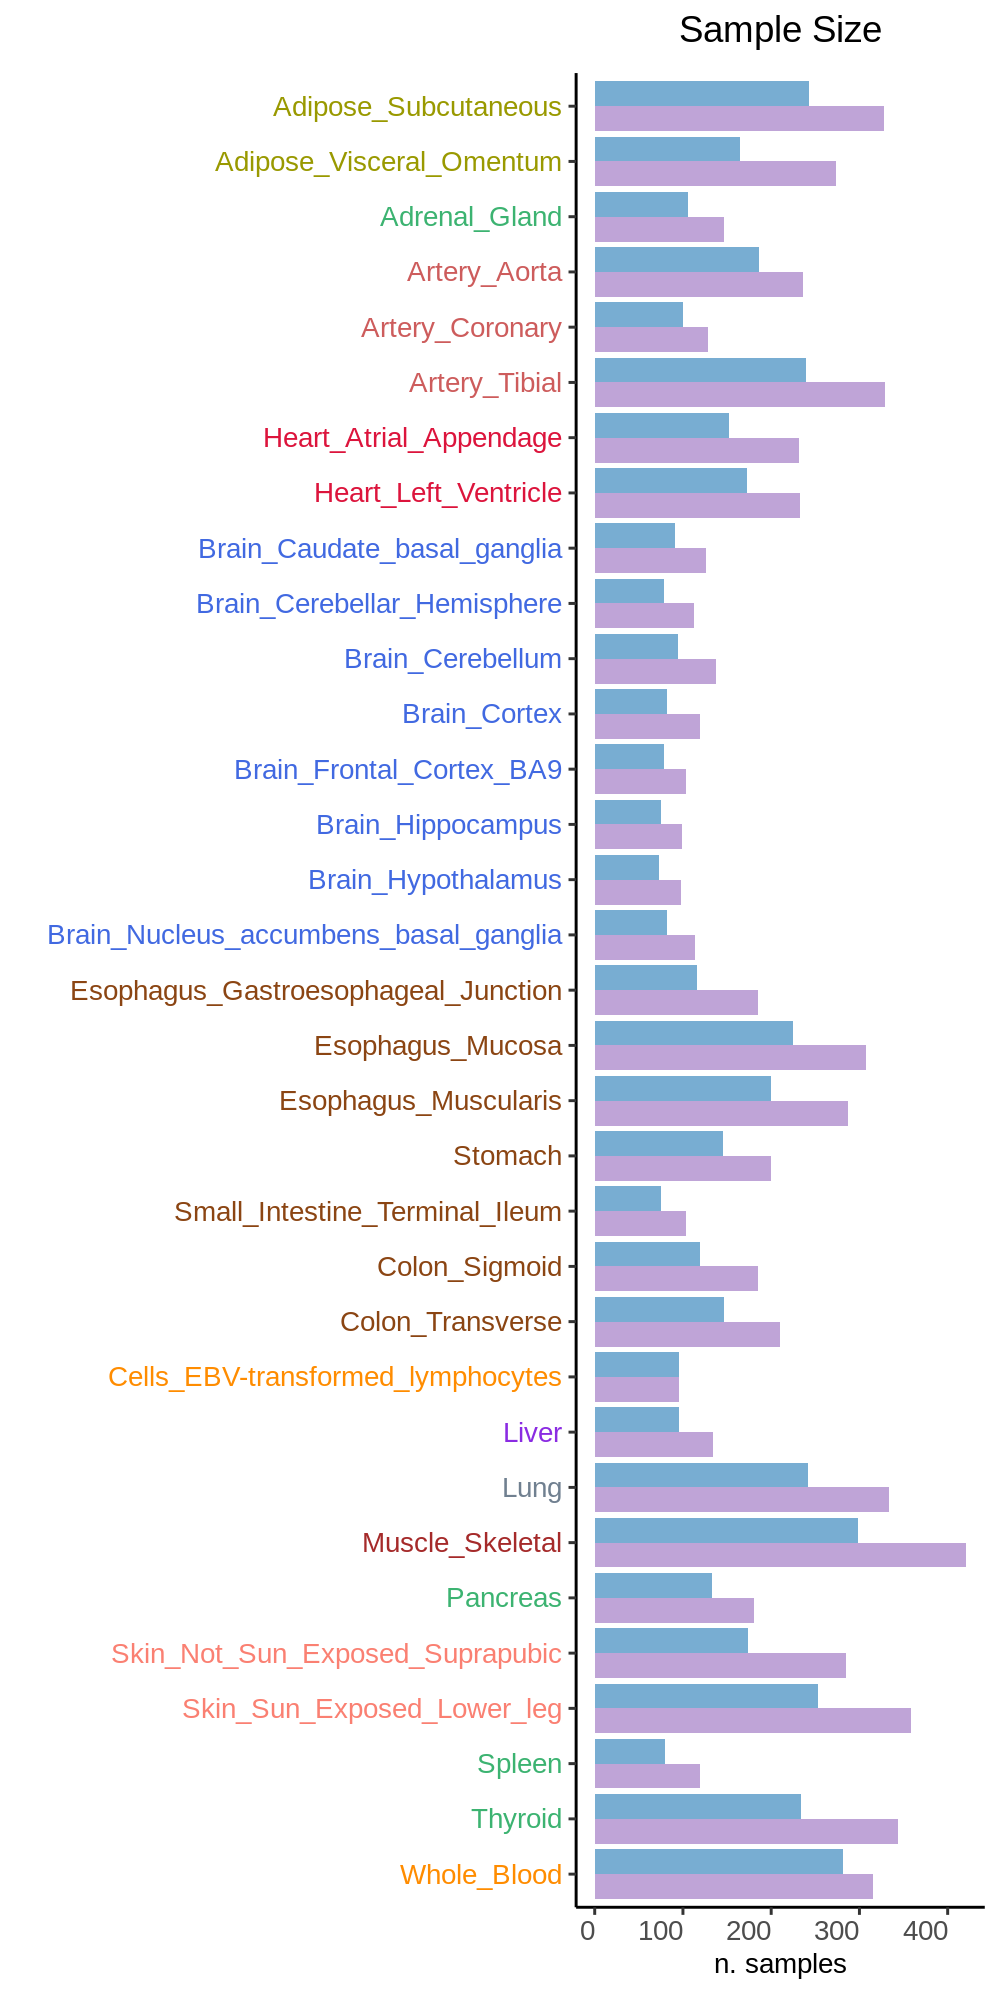

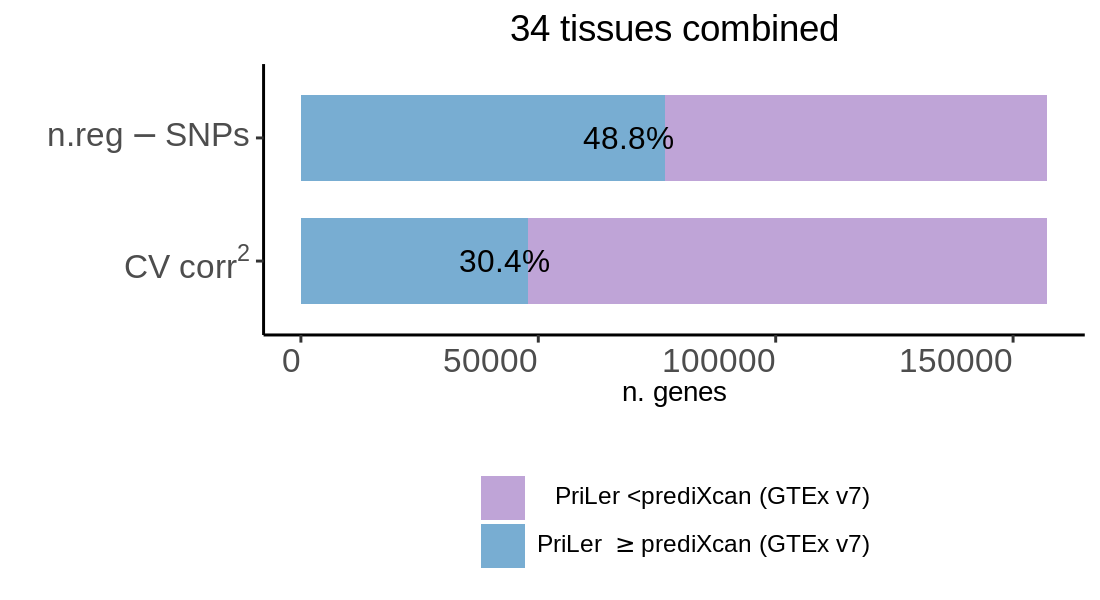

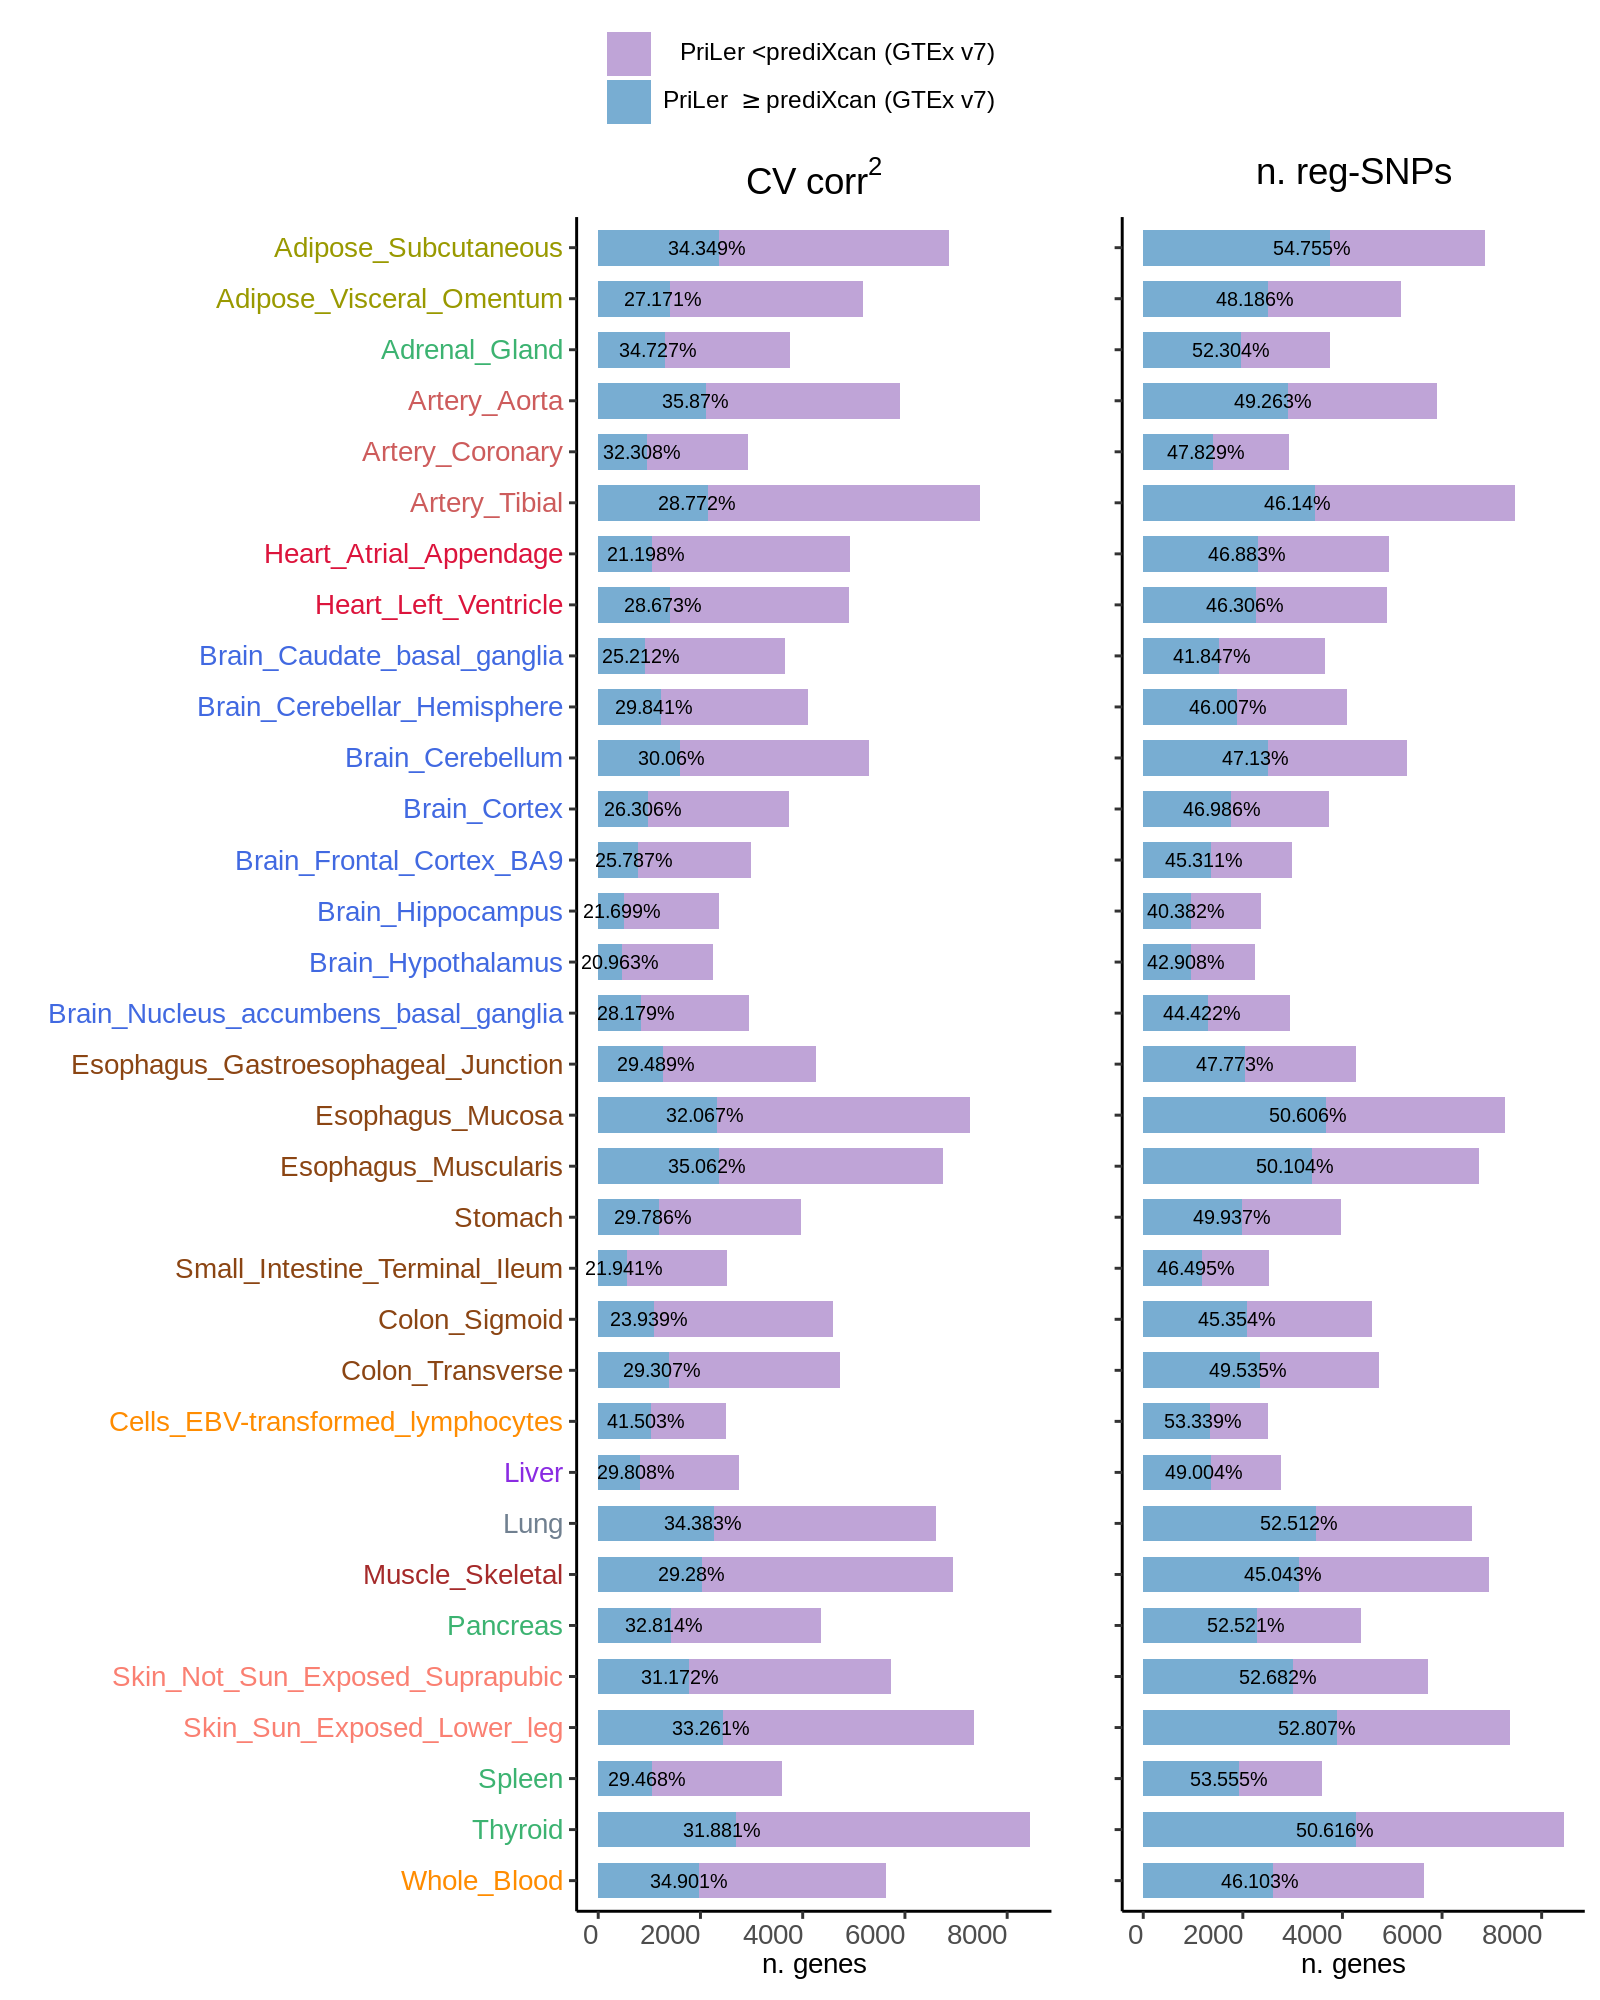

In [8]:
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 200)

#### prediXcan (GTEx v7)
predixcan_v7 <- plots_summary_comp(df_tot = df_tot_predixNew, PriLer_eval = 'test_cor', other_eval = 'pred.perf.R2', other_nsnps = 'n.snps.in.model', other_nsnps_window = 'n_snps_in_window',
                   other_name = 'prediXcan (GTEx v7)', other_name_save = 'prediXcan_v7', order_tissues = order_tissues[-length(order_tissues)]-1, color_tissues = color_tissues[-length(color_tissues)], 
                   eval_title_plot =  TeX('mean CV $corr^2$ on test folds'), color_other = color_other_prediXcan_v7, sampleSize_file_other = prediXcanNew_sampleSize, 
                  outFold = outFold, plot_print = T)


predixcan_v7$corr
predixcan_v7$n_snps
predixcan_v7$n_samples

predixcan_v7_impr <- plot_n_improved(df_pl = predixcan_v7$tab,
                                 other_name = 'prediXcan (GTEx v7)', 
                                 other_name_save = 'prediXcan_v7', 
                                 color_other = color_other_prediXcan_v7,
                                 outFold = outFold, color_tissues = color_tissues)

options(repr.plot.width = 5.5, repr.plot.height = 3, repr.plot.res = 200)
predixcan_v7_impr$all_tissues

options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 200)
predixcan_v7_impr$tissue_specific

In [47]:
### plots comparison PriLer vs prediXcan and TWAS, fraction of reg snps with prior ###

tissues_model$folder_train <- sapply(tissues_model$tissue, function(x) sprintf('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/%s/200kb/noGWAS/', x))
tissues_model$folder_train[tissues_model$type == 'CAD'] <- sapply(tissues_model$tissue[tissues_model$type == 'CAD'] ,
                                                                  function(x) sprintf('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/%s/200kb/CAD_GWAS_bin5e-2/', x))
tissues_model$folder_train[tissues_model$type == 'PGC'] <- sapply(tissues_model$tissue[tissues_model$type == 'PGC'], 
                                                                  function(x) sprintf('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/%s/200kb/PGC_GWAS_bin1e-2/', x))
prior_names <- read.csv('PriLer_PROJECT_GTEx/prior_association_TRAIN.csv', h=F, stringsAsFactors = F)
rownames(prior_names) <- prior_names$V1
prior_names <- prior_names[,-1]
prior_names <- lapply(tissues_model$tissue, function(x) prior_names[rownames(prior_names) == x,][prior_names[rownames(prior_names) == x,] != ''])
names(prior_names) <- tissues_model$tissue

# load reg-SNP TWAS and prediXcan
prediXcan_snps <- read.table(gzfile('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/AllTissues/200kb/noGWAS/prediXcan_regSNPs_annotation.txt.gz'), h=T, stringsAsFactors = F, sep = '\t', check.names = F)
prediXcan_new_id <- paste0(prediXcan_snps$chrom, '_',prediXcan_snps$position) # no duplication
prediXcan_snps <- cbind(prediXcan_snps[, 1:3], prediXcan_snps[, match(names(prior_names),colnames(prediXcan_snps))])
TWAS_snps <- read.table(gzfile('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/AllTissues/200kb/noGWAS/TWAS_regSNPs_annotation.txt.gz'), h=T, stringsAsFactors = F, sep = '\t',  check.names = F)
TWAS_new_id <- paste0(TWAS_snps$chrom, '_',TWAS_snps$position) # no diplication
TWAS_snps <- cbind(TWAS_snps[, 1:3], TWAS_snps[, match(names(prior_names),colnames(TWAS_snps))])

                      

In [48]:
### intersect with prior for model ###

chr <- 1:22
prediXcan_tissue_chr <- matrix(nrow = 22, ncol = length(prior_names))
prediXcan_prior_tissue_chr <- matrix(nrow = 22, ncol = length(prior_names))
TWAS_tissue_chr <- matrix(nrow = 22, ncol = length(prior_names))
TWAS_prior_tissue_chr <- matrix(nrow = 22, ncol = length(prior_names))
for(i in chr){
  
  print(i)
  snp_info <- read.table(sprintf('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/hg19_SNPs_chr%i_matched.txt', i), h=T, stringsAsFactors = F, sep = '\t')
  id_pos <- paste0(snp_info$chrom , '_', snp_info$position)
  priorMat <- read.table(gzfile(sprintf('PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2/priorMatrix_chr%i.txt.gz', i)), h=T, stringsAsFactors = F, sep = '\t')
  # remove duplicated positions
  priorMat <- priorMat[!duplicated(id_pos), ]
  snp_info <- snp_info[!duplicated(id_pos), ]
  
  # intersect with prediXcan
  id <- intersect(paste0(snp_info$chrom , '_', snp_info$position), prediXcan_new_id)
  id_pos <- paste0(snp_info$chrom , '_', snp_info$position)
  tmp_info <- snp_info[match(id, id_pos),]
  tmp_mat <- priorMat[match(id, id_pos),]
  
  tmp_prediXcan <- prediXcan_snps[match(id, prediXcan_new_id), ]
  prediXcan_tissue_chr[i, ] <- colSums(tmp_prediXcan[, -(1:3)]!=0)
  prediXcan_prior_tissue_chr[i, ] <- sapply(1:length(prior_names), function(x) sum((tmp_prediXcan[, names(prior_names)[x]] != 0) & (rowSums(tmp_mat[, prior_names[[x]], drop = F] !=0)>0 )))
    
  
  # intersect with TWAS
  id <- intersect(paste0(snp_info$chrom , '_', snp_info$position), TWAS_new_id)
  id_pos <- paste0(snp_info$chrom , '_', snp_info$position)
  tmp_info <- snp_info[match(id, id_pos),]
  tmp_mat <- priorMat[match(id, id_pos),]
  
  tmp_TWAS <- TWAS_snps[match(id, TWAS_new_id), ]
  TWAS_tissue_chr[i, ] <- colSums(tmp_TWAS[, -(1:3)]!=0)
  TWAS_prior_tissue_chr[i, ] <- sapply(1:length(prior_names), function(x) sum((tmp_TWAS[, names(prior_names)[x]] != 0) & (rowSums(tmp_mat[, prior_names[[x]], drop = F] !=0)>0 )))

}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22


In [49]:
df_prediXcan <- data.frame(tissue = names(prior_names), nregSNPS = colSums(prediXcan_tissue_chr), nregSNPs_with_prior = colSums(prediXcan_prior_tissue_chr))
df_prediXcan$frac <- df_prediXcan$nregSNPs_with_prior/df_prediXcan$nregSNPS
df_TWAS <- data.frame(tissue = names(prior_names), nregSNPS = colSums(TWAS_tissue_chr), nregSNPs_with_prior = colSums(TWAS_prior_tissue_chr))
df_TWAS$frac <- df_TWAS$nregSNPs_with_prior/df_TWAS$nregSNPS
write.table(df_TWAS, file = sprintf('%sTWAS_fracPrior_intersect_PriLer.txt', outFold), quote = F, sep = '\t', col.names = T, row.names = F)
write.table(df_prediXcan, file = sprintf('%sprediXcan_fracPrior_intersect_PriLer.txt', outFold), quote = F, sep = '\t', col.names = T, row.names = F)
df_PriLer <- read.delim(sprintf('%sPriLer_summary_tissueSpecific.txt', outFold), h=T, stringsAsFactors = F, sep = '\t')


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


[1] "mean difference fraction PriLer vs TWAS 0.0661033531538107"

[1] "SD difference fraction PriLer vs TWAS 0.0314736644284774"

[1] "mean difference fraction PriLer vs prediXcan 0.101461499651998"

[1] "SD difference fraction PriLer vs prediXcan 0.0332396755020714"

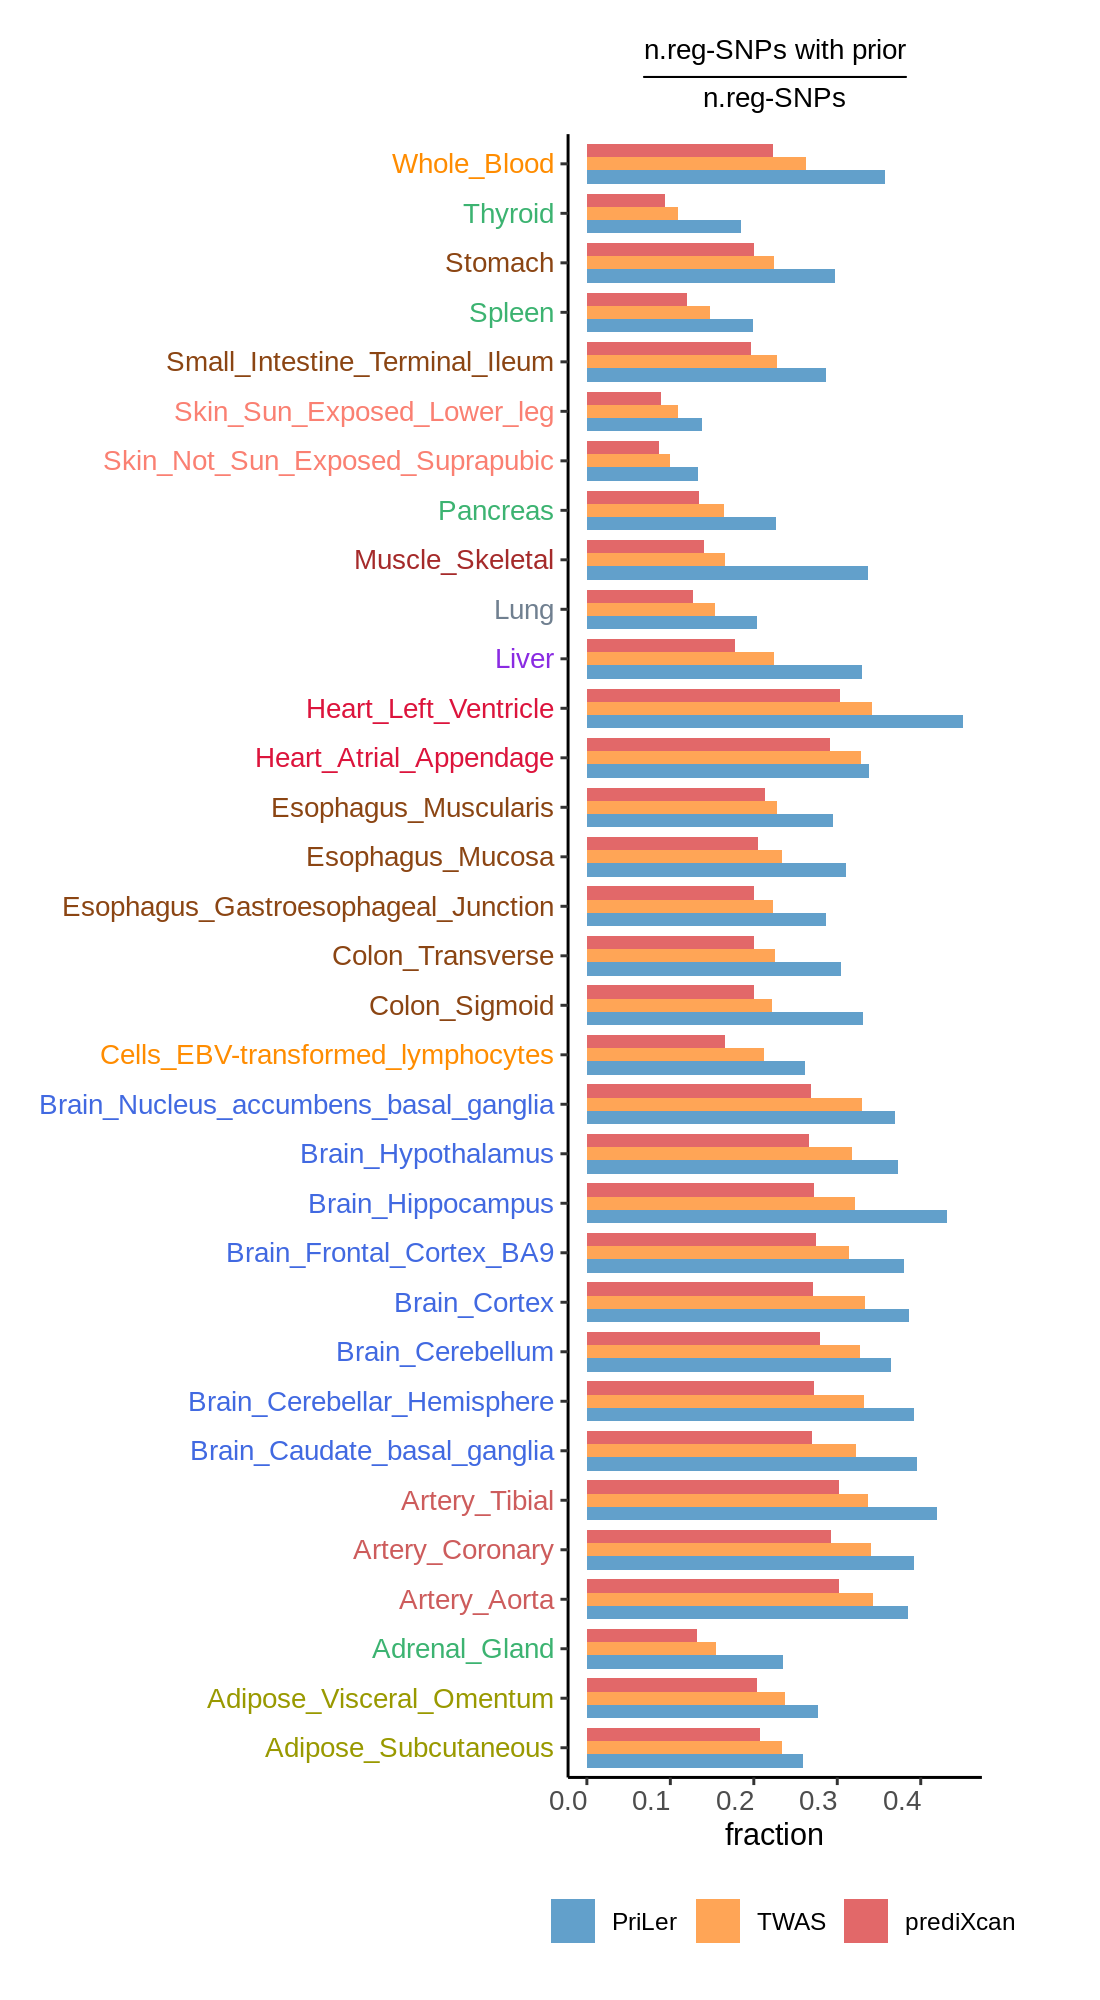

In [60]:
########################################
#### faction of reg-SNPs with prior ####
########################################
options(repr.plot.width = 5.5, repr.plot.height = 10, repr.plot.res = 200)

df_snps <- data.frame(tissue = rep(names(prior_names), 3), type = c(rep('PriLer', length(prior_names)), rep('prediXcan', length(prior_names)), rep('TWAS', length(prior_names))), 
                      frac = c(df_PriLer$fraction_regSNPs_withPrior[match(names(prior_names), df_PriLer$tissue)], df_prediXcan$frac, df_TWAS$frac))
df_snps$tissue <- factor(df_snps$tissue, levels = names(prior_names))
df_snps$type <- factor(df_snps$type, levels = c('PriLer', 'TWAS', 'prediXcan'))

color_tissues <- c(rep('#999900',2),'#3CB371', rep('#CD5C5C', 3), rep('#4169E1', 8), '#FF8C00',  rep('#8B4513', 5), rep('#DC143C', 2),   '#8A2BE2','#708090','#A52A2A',
                   '#3CB371', rep('#FA8072', 2), '#8B4513',  '#3CB371', '#8B4513', '#3CB371', '#FF8C00')
color_type <- c('#1F77B4FF', '#FF7F0EFF', '#D62728FF')

pl_frac <- ggplot(df_snps, aes(x = tissue, y = frac, fill = type, group = type)) + 
  geom_bar(alpha = 0.7, stat = 'identity', width = 0.8, position = position_dodge()) + ggtitle(expression(frac("n.reg-SNPs with prior","n.reg-SNPs")))+
  ylab('fraction')+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size = 10), axis.title.y = element_blank(), legend.title = element_blank(), 
        axis.text.x=element_text(size = 10, angle = 0, hjust = 1),
        axis.text.y=element_text(size = 10, colour = color_tissues), legend.position = 'bottom', plot.margin = margin(0.5, 1.5, 0.5, 0.5, "cm"))+
  scale_fill_manual(values = color_type)+
  coord_flip()

ggsave(filename = sprintf('%sFracRegSNPs_PriLerVSTWASandPrediXcan_AllTissues.png', outFold), plot = pl_frac, width = 5.5, height = 10, dpi = 500)
ggsave(filename = sprintf('%sFracRegSNPs_PriLerVSTWASandPrediXcan_AllTissues.pdf', outFold), plot = pl_frac, width = 5.5, height = 10, dpi = 500)

# plot
pl_frac

paste('mean difference fraction PriLer vs TWAS', mean(df_snps$frac[df_snps$type == 'PriLer'] - df_snps$frac[df_snps$type == 'TWAS'])) # 0.06610335
paste('SD difference fraction PriLer vs TWAS', sd(df_snps$frac[df_snps$type == 'PriLer'] - df_snps$frac[df_snps$type == 'TWAS'])) # 0.03147366
paste('mean difference fraction PriLer vs prediXcan', mean(df_snps$frac[df_snps$type == 'PriLer'] - df_snps$frac[df_snps$type == 'prediXcan'])) # 0.1014615
paste('SD difference fraction PriLer vs prediXcan', sd(df_snps$frac[df_snps$type == 'PriLer'] - df_snps$frac[df_snps$type == 'prediXcan'])) # 0.03323968



In [9]:
#### analysis intersection DNAase regions ####

inputFold <- 'PriLer_GTEx_model/AllTissues/200kb/noGWAS/'
DNAaseFold <- '/psycl/g/mpsziller/Analysis/SysMed/SNPannotation/'

# function to create dataframe 
create_df <- function(tissue_ann_file, dnase_file, name_type){
  
  snpsAnn <- read.table(gzfile(tissue_ann_file), h=T, stringsAsFactors = F)
  tissues_name <- c('AllTissues', colnames(snpsAnn[, !colnames(snpsAnn) %in% c('ID', 'ID_GTEx', 'ID_CAD', 'ID_PGC', 'chrom', 'position')]))
  
  dnaseAnn <- read.table(dnase_file, h=F, stringsAsFactors = F)
  colnames(dnaseAnn) <- c("chrom","chromstart","chromend","ID","chrom", "chromstart","chromend","identifier","mean_signal","numsamples","nOrder","Overlap")
  id_snpAnn <- paste(snpsAnn[,1], snpsAnn[,2], snpsAnn[,3], sep = '_')
  id_dnaaseAnn <- paste(dnaseAnn[,1], dnaseAnn[,2], dnaseAnn[,4], sep = '_')
  print(identical(id_snpAnn, id_dnaaseAnn))
  
  if(!identical(id_snpAnn, id_dnaaseAnn)){
    dnaseAnn$chrom_id <- as.numeric(sapply(dnaseAnn[,1], function(x) strsplit(x , split = 'chr')[[1]][2]))
    dnaseAnn <- dnaseAnn[order(dnaseAnn[,2]), ]
    dnaseAnn <- dnaseAnn[order(dnaseAnn$chrom_id), ]
    snpsAnn$chrom_id <-  as.numeric(sapply(snpsAnn$chrom, function(x) strsplit(x , split = 'chr')[[1]][2]))
    snpsAnn <- snpsAnn[order(snpsAnn$position), ]
    snpsAnn <- snpsAnn[order(snpsAnn$chrom_id), ]
    id_snpAnn <- paste(snpsAnn[,1], snpsAnn[,2], snpsAnn[,3], sep = '_')
    id_dnaaseAnn <- paste(dnaseAnn[,1], dnaseAnn[,2], dnaseAnn[,4], sep = '_')
    print(identical(id_snpAnn, id_dnaaseAnn))
  }
  
  dnaseAnn$numsamples_new <- dnaseAnn$numsamples
  dnaseAnn$numsamples_new[is.na(dnaseAnn$numsamples_new)] <- 0
  
  tmp <- lapply(tissues_name[-1], function(x) dnaseAnn$numsamples_new[snpsAnn[, x] == 1])
  tmp_tot <- dnaseAnn$numsamples_new[rowSums(snpsAnn[, tissues_name[-1]])>0]
  df <- data.frame(number_types = c(tmp_tot, unlist(tmp)), tissue = c(rep(tissues_name[1], length(tmp_tot)), 
                                                                      unlist(mapply(function(x,y) rep(x, length(y)), x = tissues_name[-1], y = tmp, SIMPLIFY = F))), stringsAsFactors = F)
  df$type <- name_type
  
  return(df)
  
}
                                                                                    
compute_perc <- function(df, n_id){
  
  tissues_name <- unique(df$tissue)
  perc_df <- matrix(nrow = length(n_id), ncol = length(tissues_name))
  for(i in 1:length(n_id)){
    perc_df[i,] <- sapply(tissues_name, function(x) sum(df$tissue == x & df$number_types>n_id[i])/sum(df$tissue == x))
  }
  colnames(perc_df) <- tissues_name
  rownames(perc_df) <- n_id
  
  return(perc_df)
}

                                                                                   


In [10]:
# load data
# PriLer (reliableGenes)
df_Priler_relGenes <- create_df(tissue_ann_file = sprintf('%sresPrior_regSNPs_reliableGenes_annotation.txt.gz', inputFold), 
                                dnase_file = sprintf('%sresPrior_regSNPs_reliableGenes_annotationregion_dnaseAnnotated.bed', DNAaseFold), name_type = 'PriLer (reliable Genes)')

# el-net (reliableGenes)
df_elnet_relGenes <- create_df(tissue_ann_file = sprintf('%sresNoPrior_regSNPs_reliableGenes_annotation.txt.gz', inputFold), 
                               dnase_file = sprintf('%sresNoPrior_regSNPs_reliableGenes_annotationregion_dnaseAnnotated.bed', DNAaseFold), name_type = 'el-net (reliable Genes)')

# TWAS
df_TWAS <- create_df(tissue_ann_file = sprintf('%sTWAS_regSNPs_annotation.txt.gz', inputFold), 
                     dnase_file = sprintf('%sTWAS_regSNPs_annotationregion_dnaseAnnotated.bed', DNAaseFold), name_type = 'TWAS')
# prediXcan
df_prediXcan <- create_df(tissue_ann_file = sprintf('%sprediXcan_regSNPs_annotation.txt.gz', inputFold), 
                          dnase_file = sprintf('%sprediXcan_regSNPs_annotationregion_dnaseAnnotated.bed', DNAaseFold), name_type = 'prediXcan')

n_id <- c(0, 1, 2, 3, 4, 5, seq(10, 100, 10), seq(150, 700, 50))

# PriLer (reliableGenes)
tmp <- compute_perc(df_Priler_relGenes, n_id)
df_Priler_relGenes_perc <- data.frame(n_samples_thr = rep(n_id, length(ncol(tmp))), tissue = as.vector(sapply(colnames(tmp), function(x) rep(x,length(n_id)))), 
                                      perc_higher = as.vector(tmp))
df_Priler_relGenes_perc$type <- 'PriLer (reliable Genes)'

# el-net (reliableGenes)
tmp <- compute_perc(df_elnet_relGenes, n_id)
df_elnet_relGenes_perc <- data.frame(n_samples_thr = rep(n_id, length(ncol(tmp))), tissue = as.vector(sapply(colnames(tmp), function(x) rep(x,length(n_id)))), 
                                     perc_higher = as.vector(tmp))
df_elnet_relGenes_perc$type <- 'el-net (reliable Genes)'
                                                                                                      
# TWAS
tmp <- compute_perc(df_TWAS, n_id)
df_TWAS_perc <- data.frame(n_samples_thr = rep(n_id, length(ncol(tmp))), tissue = as.vector(sapply(colnames(tmp), function(x) rep(x,length(n_id)))), 
                           perc_higher = as.vector(tmp))
df_TWAS_perc$type <- 'TWAS'

# prediXcan
tmp <- compute_perc(df_prediXcan, n_id)
df_prediXcan_perc <- data.frame(n_samples_thr = rep(n_id, length(ncol(tmp))), tissue = as.vector(sapply(colnames(tmp), function(x) rep(x,length(n_id)))), 
                                perc_higher = as.vector(tmp))
df_prediXcan_perc$type <- 'prediXcan'


[1] TRUE
[1] TRUE
[1] FALSE
[1] TRUE
[1] FALSE
[1] TRUE


In [11]:
#### create general tables (at least 1 sample) ####
df_tot <- rbind(df_Priler_relGenes_perc[df_Priler_relGenes_perc$n_samples_thr == 0, -1],
                df_elnet_relGenes_perc[df_elnet_relGenes_perc$n_samples_thr == 0, -1], 
                df_prediXcan_perc[df_prediXcan_perc$n_samples_thr == 0, -1], 
                df_TWAS_perc[df_TWAS_perc$n_samples_thr == 0, -1])

tissues <- as.character(unique(df_tot$tissue))[-1]
type_analysis <- as.character(unique(df_tot$type))
df_tot_mean <- data.frame(type = type_analysis, mean = sapply(type_analysis, function(x) mean(df_tot$perc_higher[df_tot$type == x & df_tot$tissue %in% tissues])),
                          sd = sapply(type_analysis, function(x) sd(df_tot$perc_higher[df_tot$type == x & df_tot$tissue %in% tissues])))

# save
write.table(sprintf('%spercentage_DNAase_intersection_summary.txt', outFold), x = df_tot_mean, quote = F, col.names = T, row.names = F, sep = '\t')
write.table(sprintf('%spercentage_DNAase_intersection_tissueSpec.txt', outFold), x = df_tot, quote = F, col.names = T, row.names = F, sep = '\t')


In [12]:
df_all <- rbind(df_Priler_relGenes, df_elnet_relGenes, df_TWAS, df_prediXcan)

quantile_sep <- seq(0, 1, by = 0.001)
df_plot <- data.frame(n_samples = c(), quant =c(), tissues = c(), type = c(), stringsAsFactors = F)
type_analysis <- c('PriLer (reliable Genes)','el-net (reliable Genes)','prediXcan', 'TWAS')
df_test <- data.frame(tissues = c(), type = c(), wilcox_pvalue = c(), mean = c(), stringsAsFactors = F)

for(i in 1:length(type_analysis)){
  print(i)
  for(j in 1:length(tissues)){
    
    tmp <- quantile(df_all$number_types[df_all$tissue == tissues[j] & df_all$type == type_analysis[i]], probs = quantile_sep)
    df_plot <- rbind(df_plot, data.frame(stringsAsFactors = F, n_samples = tmp, quant = quantile_sep*100, tissues = rep(tissues[j], length(tmp)), 
                                         type = rep(type_analysis[i], length(tmp))))
    
    # test difference with PriLer method
    df_test <- rbind(df_test, data.frame(stringsAsFactors = F,tissues = tissues[j], type = type_analysis[i], 
                                         wilcox_pvalue = wilcox.test(df_all$number_types[df_all$tissue == tissues[j] & df_all$type == type_analysis[i]], 
                                                                     df_all$number_types[df_all$tissue == tissues[j] & df_all$type == type_analysis[1]])$p.value, 
                                         mean = mean(df_all$number_types[df_all$tissue == tissues[j] & df_all$type == type_analysis[i]])))
    
  }
  
  tmp <- quantile(df_all$number_types[df_all$tissue == 'AllTissues' & df_all$type == type_analysis[i]], probs = quantile_sep)
  df_plot <- rbind(df_plot, data.frame(n_samples = tmp, quant = quantile_sep*100, tissues = rep( 'AllTissues', length(tmp)), 
                                       type = rep(type_analysis[i], length(tmp))))
  # test difference with PriLer method
  df_test <- rbind(df_test, data.frame(stringsAsFactors = F,tissues = 'AllTissues', type = type_analysis[i], 
                                       wilcox_pvalue = wilcox.test(df_all$number_types[df_all$tissue == 'AllTissues' & df_all$type == type_analysis[i]], 
                                                                   df_all$number_types[df_all$tissue == 'AllTissues' & df_all$type == type_analysis[1]])$p.value, 
                                       mean = mean(df_all$number_types[df_all$tissue == 'AllTissues' & df_all$type == type_analysis[i]])))
  
}

df_plot$tissues <- factor(df_plot$tissues, levels = c('AllTissues', tissues))
df_plot$type[df_plot$type == type_analysis[1]] <- 'PriLer'
df_plot$type[df_plot$type == type_analysis[2]] <- 'el-net'
df_plot$type <- factor(df_plot$type, levels = c('PriLer', 'el-net', 'TWAS', 'prediXcan'))
df_plot$log_nsamples <- log2(df_plot$n_samples + 1)
df_test_ks <- data.frame(tissues = c(), type = c(), thr_quant = c(), ks_pvalue = c(), stringsAsFactors = F)
type_analysis <- c('PriLer', 'el-net', 'TWAS', 'prediXcan')
for(i in 2:length(type_analysis)){
  
  print(i)
  for(j in 1:length(tissues)){
    tmp <-  df_plot[df_plot$type %in% c(type_analysis[1],type_analysis[i]) & df_plot$tissue == tissues[j] & df_plot$n_samples>0, ]
    thr <- min(tmp$quant)
    df_test_ks <- rbind(df_test_ks, data.frame(tissues = tissues[j], type = type_analysis[i], thr_quant = thr, 
                                               ks_pvalue = ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == type_analysis[1] & df_plot$tissue == tissues[j]],
            y = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == type_analysis[i] & df_plot$tissue == tissues[j]], alternative = 'less')$p.value))
  }
  
  tmp <-  df_plot[df_plot$type %in% c(type_analysis[1],type_analysis[i]) & df_plot$tissue == 'AllTissues' & df_plot$n_samples>0, ]
  thr <- min(tmp$quant)
  df_test_ks <- rbind(df_test_ks, data.frame(tissues = 'AllTissues', 
                                             type = type_analysis[i],  thr_quant = thr, 
                                             ks_pvalue = ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == type_analysis[1] & df_plot$tissue == 'AllTissues'],
                                                                 y = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == type_analysis[i] & df_plot$tissue == 'AllTissues'], alternative = 'less')$p.value))
  
}
df_test_ks$ks_pvalue_corr <-unlist(lapply(type_analysis[-1], function(x) p.adjust(df_test_ks$ks_pvalue[df_test_ks$type == x], method = 'BH')))
write.table(x = df_test_ks, file = sprintf('%sKS_test_distribution_notzero.txt', outFold), quote = F, col.names = T, row.names = F, sep = '\t')

df_test_ks$value <- paste(df_test_ks$type,  formatC(df_test_ks$ks_pvalue, format = "e", digits = 1))
df_test_ks$position <- 74
df_test_ks$position[df_test_ks$type == 'prediXcan'] <- 68
df_test_ks$position[df_test_ks$type == 'TWAS'] <- 62
df_test_ks$tissue <- factor(df_test_ks$tissues, levels = c('AllTissues', tissues))
df_test_ks$x <- 6.5
df_test_ks$type <- factor(df_test_ks$type, level = type_analysis)


[1] 1
[1] 2
[1] 3
[1] 4
[1] 2


Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence o

[1] 3


Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence o

[1] 4


Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence of ties”
Warning message in ks.test(x = df_plot$n_samples[df_plot$quant >= thr & df_plot$type == :
“p-value will be approximate in the presence o

Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”


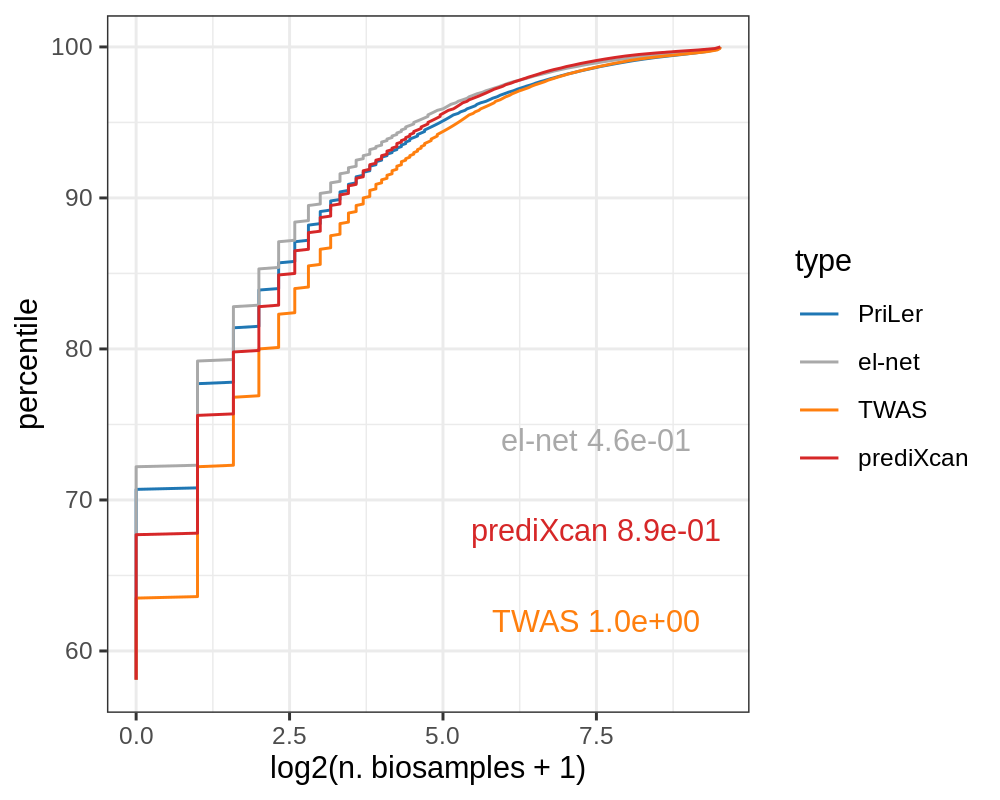

In [15]:
##################################################
### cumulative distribution across all tissues ###
##################################################

options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)

color_type <- c('#1F77B4FF', 'darkgrey', '#FF7F0EFF', '#D62728FF')

pl <- ggplot(data = subset(df_plot, tissues == 'AllTissues'), aes(y = quant, x = log_nsamples, color = type))+
  geom_line()+
  theme_bw()+ ylim(58, 100)+
  ylab('percentile')+xlab('log2(n. biosamples + 1)')+ 
  theme(legend.position = 'right', plot.title = element_text(size=9))+
  annotate("text", x = 7.5, y = df_test_ks$position[df_test_ks$tissue == 'AllTissues'], label = df_test_ks$value[df_test_ks$tissue == 'AllTissues'], color = c('darkgrey', '#FF7F0EFF', '#D62728FF'))+
  scale_color_manual(values=color_type)
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_AllTissues.png', outFold), width = 5, height = 4, plot = pl, device = 'png')
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_AllTissues.pdf', outFold), width = 5, height = 4, plot = pl, device = 'pdf')

# plot 
pl

Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”


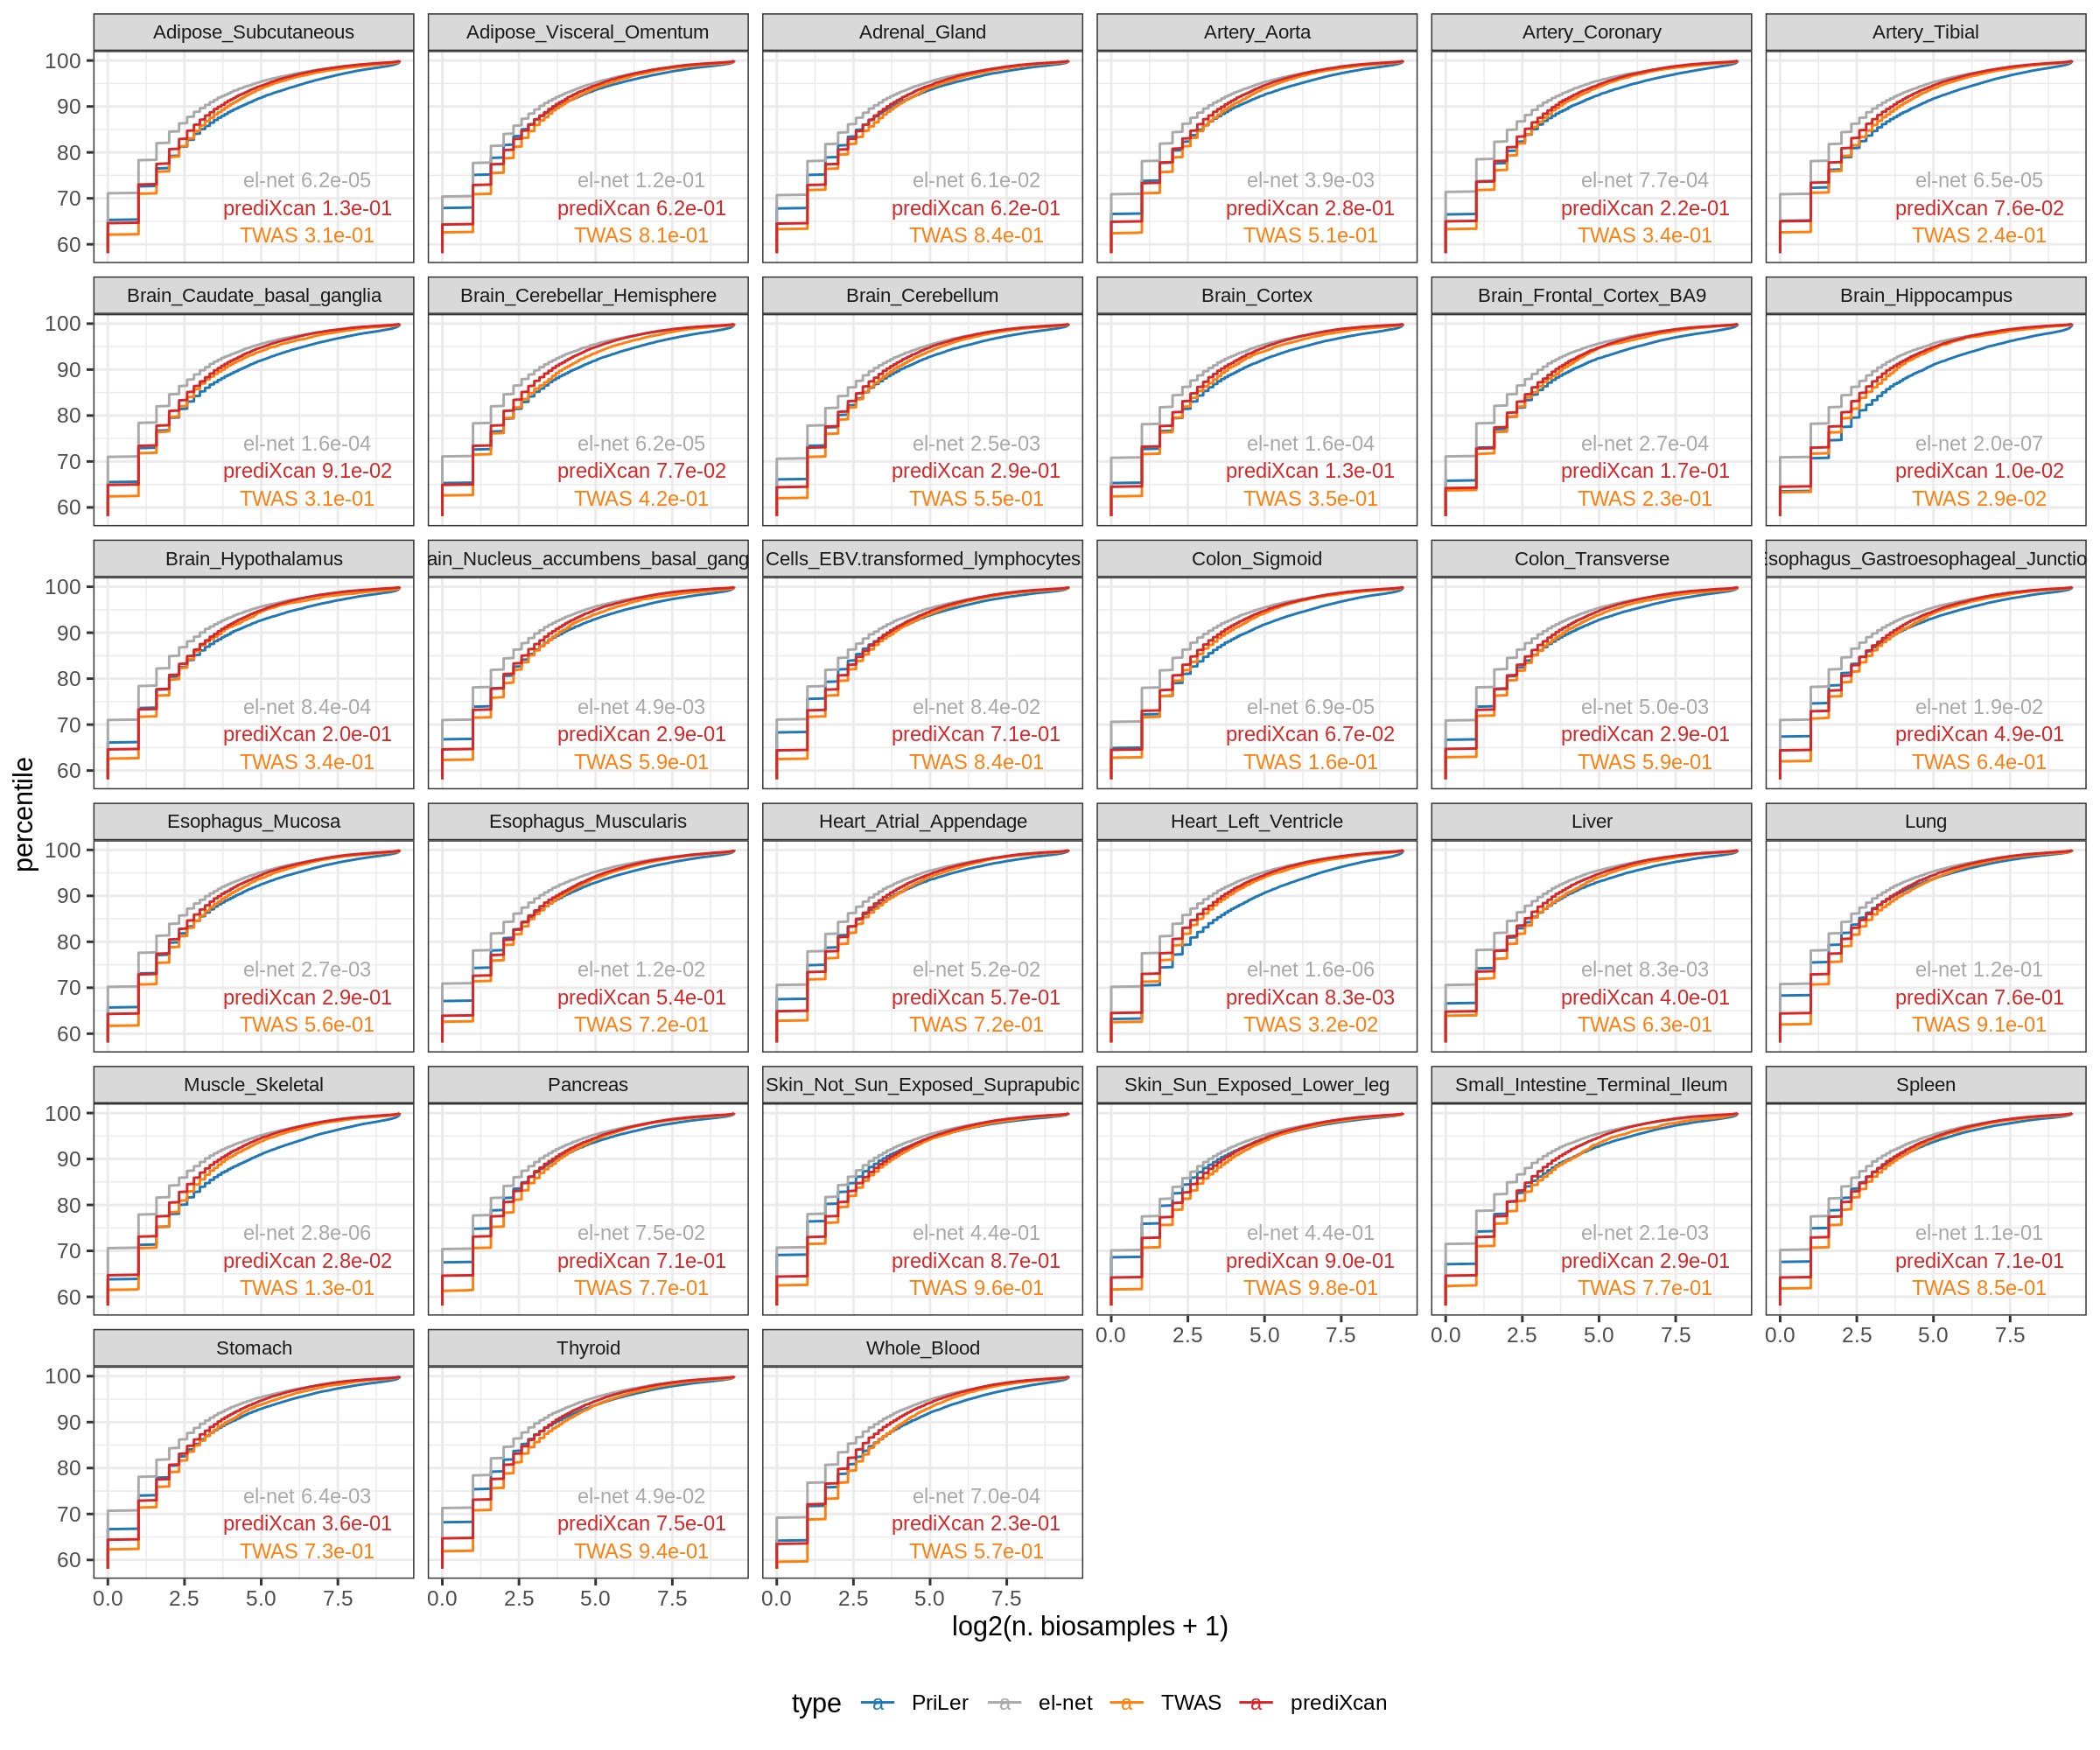

In [16]:
######################################################
### cumulative distribution across tissue specific ###
######################################################

options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 200)

pl <- ggplot(data = subset(df_plot, tissues != 'AllTissues'), aes(y = quant, x = log_nsamples, color = type))+
  geom_line()+
  theme_bw()+ ylim(58, 100)+
  facet_wrap(.~tissues, ncol = 6)+
  ylab('percentile')+xlab('log2(n. biosamples + 1)')+
  geom_text(data = subset(df_test_ks, tissue != 'AllTissues'), mapping = aes(x = x, y = position, label = value, color = type), size = 3)+
  theme(legend.position = 'bottom', strip.text = element_text(size = 8))+
  scale_color_manual(values=color_type)
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_TissueSpec.png', outFold), width = 12, height = 10, plot = pl, device = 'png')
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_TissueSpec.pdf', outFold), width = 12, height = 10, plot = pl, device = 'pdf')

# plot 
pl


Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2324 row(s) containing missing values (geom_path).”


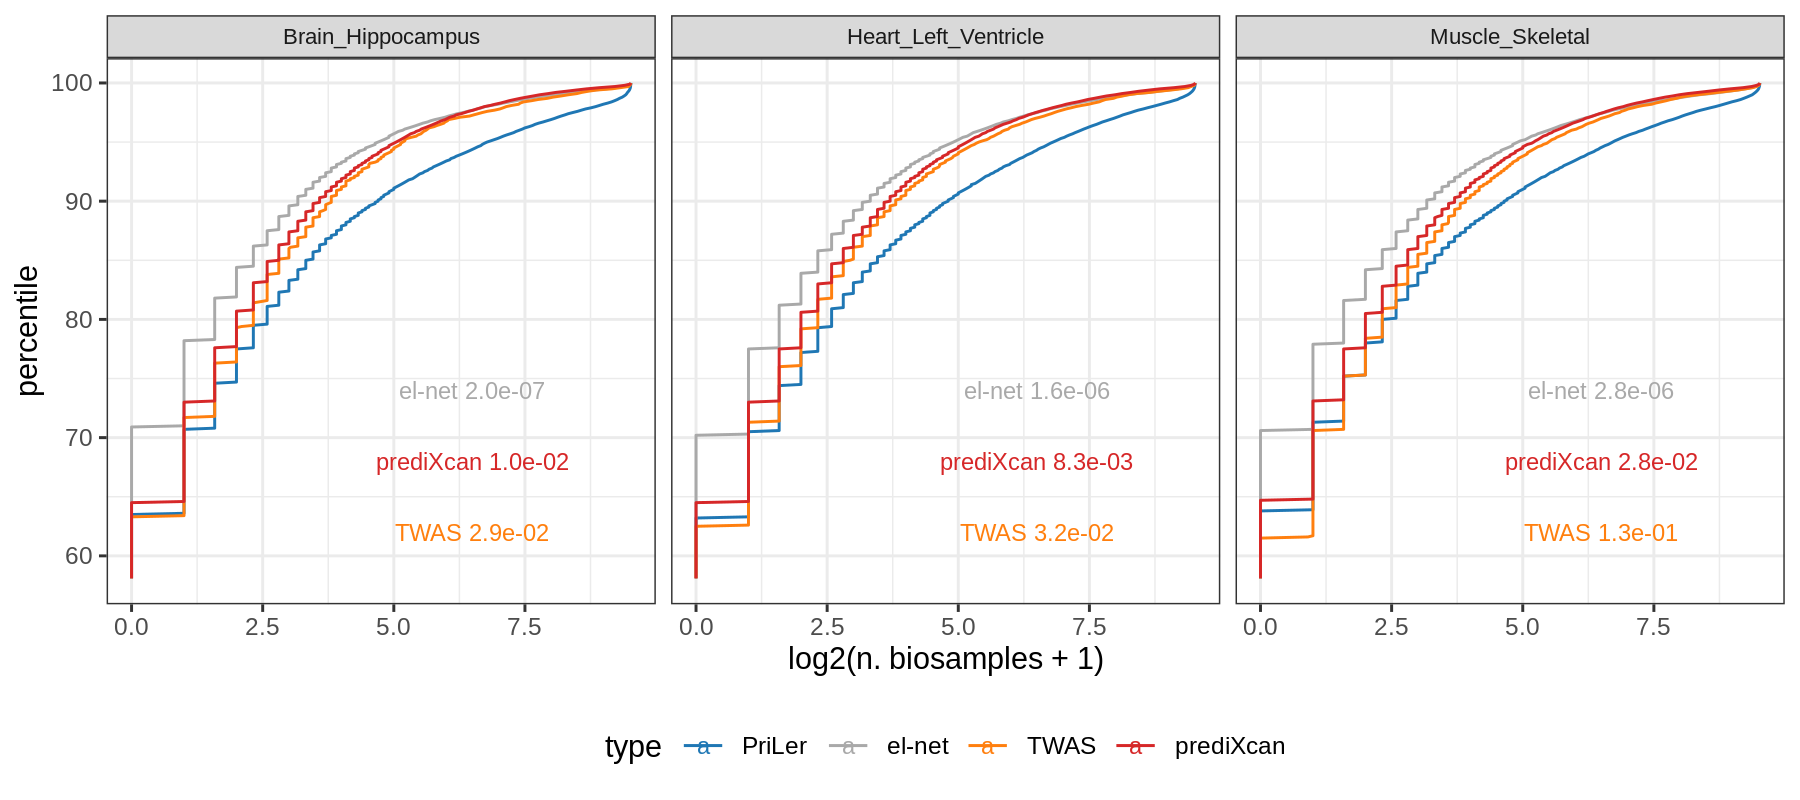

In [17]:
#######################################################
### cumulative distribution across selected tissues ###
#######################################################

options(repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 200)

pl <- ggplot(data = subset(df_plot, tissues %in% c('Heart_Left_Ventricle', 'Brain_Hippocampus', 'Muscle_Skeletal')), aes(y = quant, x = log_nsamples, color = type))+
  geom_line()+
  theme_bw()+ ylim(58, 100)+
  facet_wrap(.~tissues, ncol = 6)+
  ylab('percentile')+xlab('log2(n. biosamples + 1)')+
  geom_text(data = subset(df_test_ks, tissue %in% c('Heart_Left_Ventricle', 'Brain_Hippocampus', 'Muscle_Skeletal')), mapping = aes(x = x, y = position, label = value, color = type), size = 3)+
  theme(legend.position = 'bottom', strip.text = element_text(size = 8))+
  scale_color_manual(values=color_type)
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_TissueSel.png', outFold), width = 9, height = 4, plot = pl, device = 'png')
ggsave(filename = sprintf('%spercentile_nsamples_DNAase_TissueSel.pdf', outFold), width = 9, height = 4, plot = pl, device = 'pdf')

# plot 
pl


In [18]:
table(df_Priler_relGenes$tissue)


                 Adipose_Subcutaneous              Adipose_Visceral_Omentum 
                               189648                                139120 
                        Adrenal_Gland                            AllTissues 
                               123737                               1641444 
                         Artery_Aorta                       Artery_Coronary 
                               182963                                 88654 
                        Artery_Tibial           Brain_Caudate_basal_ganglia 
                               183110                                 93889 
          Brain_Cerebellar_Hemisphere                      Brain_Cerebellum 
                               115202                                154078 
                         Brain_Cortex              Brain_Frontal_Cortex_BA9 
                                99134                                 81467 
                    Brain_Hippocampus                    Brain_Hypothalamus